In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import math
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import warnings
warnings.simplefilter("ignore")
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
# !pip install --upgrade seaborn
# import seaborn as sns
# import matplotlib.pyplot as plt

# !pip install heatmapz
# from heatmap import heatmap, corrplot
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/its-a-fraud/train.csv
/kaggle/input/its-a-fraud/test.csv
/kaggle/input/its-a-fraud/mock_submission.csv


In [14]:
train_df = pd.read_csv('../input/its-a-fraud/train.csv')
test_df = pd.read_csv('../input/its-a-fraud/test.csv')
print("size of training dataset:" + str(train_df.shape))
print("size of testing dataset:" + str(test_df.shape))

size of training dataset:(442905, 434)
size of testing dataset:(147635, 433)


In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [16]:
train_df.head(10)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        3424175        0       11053717          49.000         W   5033   
1        3206179        0        5150800          57.950         W   4527   
2        3410455        0       10713596         115.950         W   2772   
3        3058578        0        1611950         100.000         H  14290   
4        3242131        0        6111087          95.000         W  12839   
5        3462464        0       12280899          51.000         W  15344   
6        3110647        0        2425189          12.826         C  15885   
7        3571438        0       15625459         189.950         W  17131   
8        3138969        0        3132775          52.587         C   9633   
9        3379073        0        9838946         107.950         W  16255   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0  269.0  150.0  mastercard  224.0   debit  330.0   87.0    6.0    NaN   
1  376.0  150.0        visa  226.0   debit  441.0   87.0    NaN    NaN   
2  512.0  150.0        visa  226.0   debit  143.0   87.0   14.0    NaN   
3  512.0  150.0        visa  226.0   debit  177.0   87.0    NaN    NaN   
4  321.0  150.0        visa  226.0   debit  220.0   87.0    6.0    NaN   
5  321.0  150.0        visa  226.0   debit  310.0   87.0   17.0    NaN   
6  545.0  185.0        visa  138.0   debit    NaN    NaN    NaN  546.0   
7  111.0  150.0  mastercard  224.0   debit  264.0   87.0    NaN    NaN   
8  296.0  185.0        visa  138.0   debit    NaN    NaN    NaN    7.0   
9  470.0  150.0  mastercard  137.0  credit  143.0   87.0    NaN    NaN   

     P_emaildomain R_emaildomain    C1    C2   C3   C4     C5    C6   C7   C8  \
0        gmail.com           NaN   2.0   2.0  0.0  0.0    0.0   1.0  0.0  0.0   
1        gmail.com           NaN   2.0   2.0  0.0  0.0    1.0   2.0  0.0  0.0   
2  centurylink.net           NaN   2.0   1.0  0.0  0.0    1.0   1.0  0.0  0.0   
3        yahoo.com     yahoo.com   1.0   1.0  0.0  1.0    0.0   1.0  0.0  1.0   
4        gmail.com           NaN  84.0  87.0  0.0  0.0  142.0  69.0  0.0  0.0   
5        gmail.com           NaN   1.0   1.0  0.0  0.0    1.0   1.0  0.0  0.0   
6        gmail.com     gmail.com   1.0   1.0  0.0  1.0    0.0   1.0  1.0  1.0   
7        yahoo.com           NaN   2.0   1.0  0.0  0.0    1.0   1.0  0.0  0.0   
8        gmail.com     gmail.com   1.0   1.0  0.0  1.0    0.0   1.0  1.0  1.0   
9              NaN           NaN   1.0   1.0  0.0  0.0    1.0   0.0  0.0  0.0   

     C9  C10   C11  C12    C13   C14     D1     D2    D3     D4    D5   D6  \
0   1.0  0.0   1.0  1.0   21.0   2.0   14.0   14.0   9.0  370.0   9.0  NaN   
1   2.0  0.0   2.0  0.0   14.0   2.0  136.0  136.0   8.0  136.0   8.0  NaN   
2   1.0  0.0   1.0  0.0   14.0   2.0  193.0  193.0   0.0  495.0   0.0  NaN   
3   0.0  1.0   1.0  0.0    1.0   1.0    0.0    NaN   NaN    0.0   NaN  0.0   
4  48.0  0.0  54.0  0.0  483.0  74.0   35.0   35.0   1.0  566.0   1.0  NaN   
5   1.0  0.0   1.0  0.0    3.0   1.0   17.0   17.0   3.0   17.0   3.0  NaN   
6   0.0  1.0   1.0  1.0    1.0   1.0    0.0    NaN   NaN    0.0   NaN  0.0   
7   3.0  0.0   1.0  0.0    3.0   2.0   60.0   60.0  60.0   90.0  60.0  NaN   
8   0.0  1.0   1.0  1.0    1.0   1.0    0.0    NaN   NaN    0.0   NaN  0.0   
9   1.0  0.0   1.0  0.0    1.0   1.0    0.0    NaN   NaN    NaN   NaN  NaN   

   D7       D8     D9    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4  \
0 NaN      NaN    NaN   14.0  351.0  NaN  NaN  NaN  375.0    T    T    T   M0   
1 NaN      NaN    NaN  136.0    NaN  NaN  NaN  NaN  136.0  NaN  NaN  NaN  NaN   
2 NaN      NaN    NaN  495.0  495.0  NaN  NaN  NaN  495.0    T    T    T  NaN   
3 NaN  754.625  0.625    0.0    NaN  NaN  0.0  0.0    0.0  NaN  NaN  NaN  NaN   
4 NaN      NaN    NaN   76.0  559.0  NaN  NaN  NaN  559.0    T    T    T   M0   
5 NaN      NaN    NaN   17.0   17.0  NaN  NaN  NaN   17.0    T    T    T  NaN   
6 NaN      NaN    NaN 

In [17]:
test_df.head(10)

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3460689       12245831         325.000         W  12932  361.0   
1        3415050       10807203          37.257         C  14276  177.0   
2        3408682       10685267         100.000         R  16506  554.0   
3        3389297       10160809          57.950         W   9500  321.0   
4        3366334        9492365          34.258         C  15885  545.0   
5        3217596        5458050         107.950         W   4806  490.0   
6        3517656       13975131         149.950         W  15651  417.0   
7        3527748       14252772          92.000         W   9485  111.0   
8        3092143        2080592          20.000         H  17188  321.0   
9        3387777       10103633          69.483         C   5812  408.0   

   card3       card4  card5   card6  addr1  addr2  dist1  dist2 P_emaildomain  \
0  150.0        visa  226.0   debit  126.0   87.0   24.0    NaN     gmail.com   
1  185.0  mastercard  137.0  credit    NaN    NaN    NaN    NaN     gmail.com   
2  150.0        visa  226.0  credit  299.0   87.0    NaN    3.0     gmail.com   
3  150.0        visa  226.0   debit  441.0   87.0  295.0    NaN     gmail.com   
4  185.0        visa  138.0   debit  284.0   60.0    NaN    NaN   hotmail.com   
5  150.0        visa  226.0   debit  315.0   87.0    NaN    NaN     gmail.com   
6  150.0        visa  226.0   debit  330.0   87.0   29.0    NaN     yahoo.com   
7  150.0        visa  226.0   debit  315.0   87.0   12.0    NaN     yahoo.com   
8  150.0        visa  226.0   debit  299.0   87.0    NaN    NaN     gmail.com   
9  185.0  mastercard  224.0   debit    NaN    NaN    NaN    NaN   hotmail.com   

  R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  \
0           NaN  3.0  1.0  0.0  0.0  0.0  2.0  0.0  0.0  2.0  0.0  1.0  0.0   
1     gmail.com  0.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0   
2     gmail.com  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   
3           NaN  1.0  1.0  0.0  0.0  1.0  2.0  0.0  0.0  1.0  0.0  1.0  0.0   
4   hotmail.com  1.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0   
5           NaN  3.0  2.0  0.0  0.0  1.0  2.0  0.0  0.0  1.0  0.0  2.0  0.0   
6           NaN  4.0  3.0  0.0  0.0  2.0  2.0  0.0  0.0  3.0  0.0  3.0  0.0   
7           NaN  2.0  4.0  0.0  0.0  0.0  2.0  0.0  0.0  2.0  0.0  1.0  1.0   
8     yahoo.com  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   
9   hotmail.com  2.0  3.0  0.0  1.0  0.0  1.0  1.0  3.0  0.0  2.0  2.0  2.0   

    C13  C14     D1     D2    D3    D4    D5   D6   D7        D8        D9  \
0   0.0  0.0    0.0    NaN   0.0   0.0   0.0  NaN  NaN       NaN       NaN   
1   0.0  0.0    0.0    NaN   NaN   0.0   NaN  0.0  NaN       NaN       NaN   
2   1.0  1.0    0.0    NaN   NaN   NaN   NaN  NaN  NaN       NaN       NaN   
3   2.0  1.0   35.0   35.0  35.0   0.0   NaN  NaN  NaN       NaN       NaN   
4   1.0  1.0    0.0    NaN   NaN   0.0   NaN  0.0  NaN       NaN       NaN   
5  18.0  3.0    0.0    NaN   NaN   0.0   NaN  NaN  NaN       NaN       NaN   
6   8.0  2.0    0.0    NaN   NaN  47.0  25.0  NaN  NaN       NaN       NaN   
7   5.0  2.0  261.0  261.0  10.0  54.0  10.0  NaN  NaN       NaN       NaN   
8   1.0  1.0    0.0    NaN   NaN   NaN   NaN  NaN  NaN  0.041666  0.041666   
9   1.0  1.0    0.0    NaN   NaN   1.0   0.0  1.0  0.0       NaN       NaN   

     D10   D11  D12  D13    D14    D15   M1   M2   M3   M4   M5   M6   M7  \
0  166.0   0.0  NaN  NaN    NaN  166.0    T    T    T   M0    T    T    F   
1    0.0   NaN  0.0  0.0  427.0    0.0  NaN  NaN  NaN   M2  NaN  NaN  NaN   
2    NaN   NaN  NaN  NaN    NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3   35.0  35.0  NaN  NaN    NaN   35.0    T    T    T  NaN  NaN    F    F   
4    0.0   NaN  0.0  NaN    NaN    0.0  NaN  NaN  NaN   M2  NaN  NaN  NaN   
5    0.0   NaN  NaN  NaN    NaN    0.0  NaN  NaN  NaN  NaN  NaN    F  NaN   
6   47.0  47.0  N

In [18]:
nan1 = train_df.isna().sum()

In [19]:
nans = []
for a,b in nan1.items():
    if(b<10000):
        nans.append(a)
len(nans)

112

There are **112 columns** which have less than **5000 NaN values**. We will collect the names of these columns and drop the corresponding rows where these column values are NaN. We can afford to do this as the given training data set is huge.

In [20]:
train_df = train_df.dropna(subset=nans)

In [21]:
train_df.shape

(433584, 434)

In [22]:
y_train = train_df.iloc[:,1]
train_df = train_df.drop(['isFraud'], axis = 1)

In [23]:
bignans = []
bignans = train_df.columns[train_df.isnull().mean() > 0.90]

In [24]:
len(bignans)        

12

There are **12 columns** which have **90 percent** of the values as NaN values, so we will better drop these columns.

In [25]:
y_train.value_counts()

0    418577
1     15007
Name: isFraud, dtype: int64

In [26]:
print("Percentage of a transaction not being fraudulent: " + str((427408/(427408 + 15497))*100) + "%")
print("Percentage of a transaction being fraudulent: " + str((15497/(427408 + 15497))*100) + "%")

Percentage of a transaction not being fraudulent: 96.50105553109583%
Percentage of a transaction being fraudulent: 3.4989444689041664%


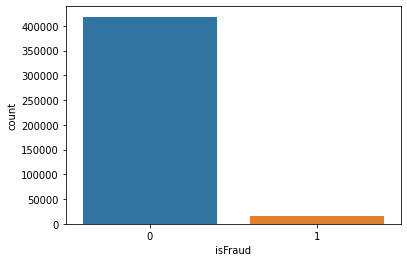

In [27]:
sns.countplot(y_train)
plt.show()

In [28]:
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
# first performing oversampling to minority class
X_over, y_over = over.fit_resample(train_df, y_train)
# # now to comine under sampling 


In [29]:
x_under, y_under = under.fit_resample(X_over, y_over)

In [30]:
x_under.shape

(470898, 433)

In [31]:
y_train = y_under
train_df = x_under

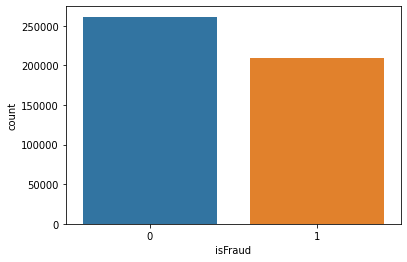

In [32]:
sns.countplot(y_train)
plt.show()

In [33]:
train_df.shape

(470898, 433)

In [34]:
df = train_df.append(test_df)

In [35]:
df = df[df.columns[df.isnull().mean() < 0.90]]

In [36]:
df.shape

(618533, 424)

In [37]:
df.head(10)

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3404955       10551144          16.434         C  15146  311.0   
1        3062723        1651169         100.000         R   8075  399.0   
2        3121154        2675413         226.000         W   9500  321.0   
3        3028876        1020945         107.950         W  15675  555.0   
4        3316269        8105299         186.000         W   7919  194.0   
5        3420183       10954704         117.000         W  14392  526.0   
6        3476885       12774196          30.950         W  11814  455.0   
7        3286827        7412446          57.950         W  10616  583.0   
8        3373371        9677867          33.950         W   2392  360.0   
9        3060541        1629886          26.500         W   1444  490.0   

   card3             card4  card5   card6  addr1  addr2  dist1  dist2  \
0  185.0              visa  102.0  credit    NaN    NaN    NaN    NaN   
1  150.0  american express  119.0  credit  512.0   87.0    NaN    NaN   
2  150.0              visa  226.0   debit  272.0   87.0    4.0    NaN   
3  150.0              visa  226.0   debit  420.0   87.0   12.0    NaN   
4  150.0        mastercard  166.0   debit  327.0   87.0    NaN    NaN   
5  150.0              visa  226.0   debit  264.0   87.0    3.0    NaN   
6  150.0        mastercard  126.0   debit  492.0   87.0  191.0    NaN   
7  150.0              visa  226.0  credit  264.0   87.0   19.0    NaN   
8  150.0        mastercard  126.0   debit  433.0   87.0    3.0    NaN   
9  150.0              visa  166.0   debit  126.0   87.0    1.0    NaN   

  P_emaildomain  R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0   hotmail.com    hotmail.com  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0   
1     gmail.com  anonymous.com  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0   
2     yahoo.com            NaN  5.0  4.0  0.0  0.0  0.0  2.0  0.0  0.0  3.0   
3     yahoo.com            NaN  1.0  1.0  0.0  0.0  1.0  2.0  0.0  0.0  1.0   
4     gmail.com            NaN  2.0  3.0  0.0  0.0  0.0  2.0  0.0  0.0  2.0   
5   hotmail.com            NaN  1.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
6     gmail.com            NaN  1.0  1.0  0.0  0.0  1.0  2.0  0.0  0.0  2.0   
7           NaN            NaN  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   
8     gmail.com            NaN  9.0  6.0  0.0  0.0  3.0  4.0  0.0  0.0  5.0   
9     yahoo.com            NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   

   C10  C11  C12   C13  C14     D1     D2    D3     D4    D5   D6  D7  D8  D9  \
0  0.0  1.0  1.0   1.0  1.0    0.0    NaN   NaN    0.0   NaN  0.0 NaN NaN NaN   
1  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN    NaN   NaN  NaN NaN NaN NaN   
2  0.0  2.0  0.0   5.0  3.0    0.0    NaN   NaN  252.0  57.0  NaN NaN NaN NaN   
3  0.0  1.0  0.0  12.0  1.0  469.0  469.0  65.0  469.0  65.0  NaN NaN NaN NaN   
4  0.0  1.0  1.0   7.0  2.0   26.0   26.0   0.0  304.0   0.0  NaN NaN NaN NaN   
5  0.0  1.0  1.0  20.0  1.0  174.0  174.0  11.0  174.0  11.0  NaN NaN NaN NaN   
6  0.0  2.0  0.0  22.0  1.0  620.0  616.0  11.0   99.0  11.0  NaN NaN NaN NaN   
7  0.0  1.0  0.0   7.0  1.0   46.0   46.0   7.0    NaN   NaN  NaN NaN NaN NaN   
8  0.0  7.0  0.0  14.0  7.0   43.0   43.0   0.0   42.0   0.0  NaN NaN NaN NaN   
9  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN    0.0   NaN  NaN NaN NaN NaN   

     D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0    0.0    NaN  0.0  0.0  NaN    0.0  NaN  NaN  NaN   M2  NaN  NaN  NaN  NaN   
1    NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2   84.0    0.0  NaN  NaN  NaN   84.0    T    T    F   M0    T    F    F    T   
3  469.0  469.0  NaN  NaN  NaN  469.0    T    T    T  NaN  NaN    T    F    F   
4  212.0    0.0  NaN  NaN  NaN  304.0    T    T    F   M0    T    F    F    F   
5   98.0  177.0  NaN  NaN  NaN  177.0    T    T    T   M0    F    T  NaN  NaN   
6  621.0   99.0  NaN  NaN  NaN   80.0    T  

In [38]:
df.isna().sum()

TransactionID          0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               2229
card3                384
card4                386
card5               1084
card6                386
addr1             121201
addr2             121201
dist1             404017
dist2             555873
P_emaildomain      94526
R_emaildomain     411879
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                   334
D2                322566
D3                293272
D4                180152
D5                314762
D6                492254
D7                534555
D8                487400
D9                487400
D10                92624


In [39]:
cards = df[['card1','card2','card3','card4','card5','card6']]
cards.head(10)

card1  card2  card3             card4  card5   card6
0  15146  311.0  185.0              visa  102.0  credit
1   8075  399.0  150.0  american express  119.0  credit
2   9500  321.0  150.0              visa  226.0   debit
3  15675  555.0  150.0              visa  226.0   debit
4   7919  194.0  150.0        mastercard  166.0   debit
5  14392  526.0  150.0              visa  226.0   debit
6  11814  455.0  150.0        mastercard  126.0   debit
7  10616  583.0  150.0              visa  226.0  credit
8   2392  360.0  150.0        mastercard  126.0   debit
9   1444  490.0  150.0              visa  166.0   debit

In [40]:
cards.isna().sum()

card1       0
card2    2229
card3     384
card4     386
card5    1084
card6     386
dtype: int64

In [41]:
df['card6'].fillna(df['card6'].mode()[0], inplace = True )
df['card4'].fillna(df['card4'].mode()[0], inplace = True )

In [42]:
my_imputer = SimpleImputer()
# my_imputer = KNNImputer(n_neighbors=1)

df[['card1', 'card2', 'card3','card5']] = my_imputer.fit_transform(df[['card1', 'card2', 'card3','card5']])

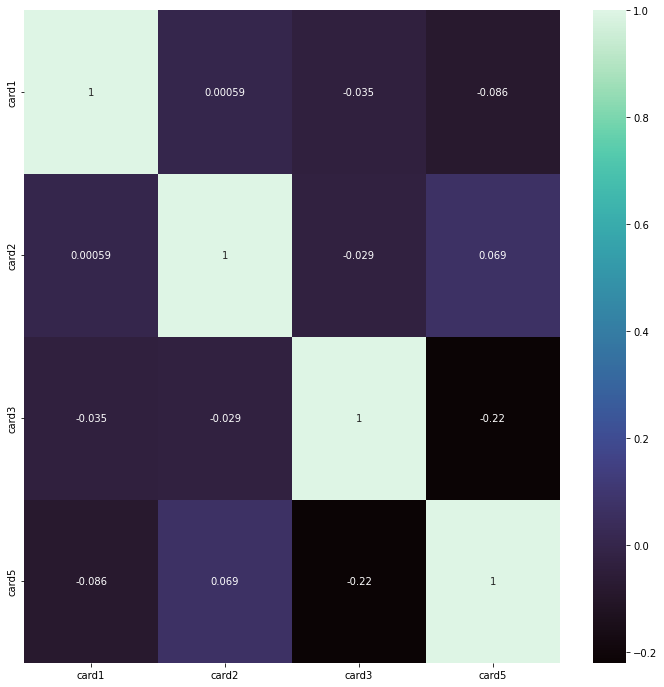

In [43]:
corr = cards.corr()
plt.figure(figsize = (12,12))
ax = sns.heatmap(corr, annot = True, cmap = 'mako')

As we can clearly see,there is no correlation between any of the columns so we cannot drop any of the columns, and card4 and card6 columns have categorical values, therefore did not show up in the heatmap

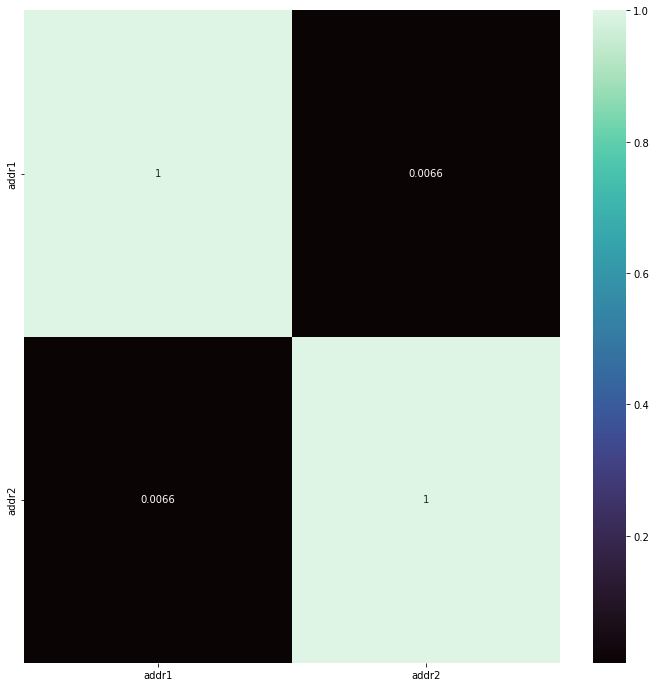

In [44]:
corr1 = df[['addr1', 'addr2']].corr()
plt.figure(figsize = (12,12))
ax = sns.heatmap(corr1, annot = True, cmap = 'mako')

As both the address columns are barely correlated, we cannot drop either of them, so we will fill the nan values with mean or mode or median.

In [45]:
df[['addr1', 'addr2']].describe()

addr1          addr2
count  497332.000000  497332.000000
mean      291.842013      86.679791
std       102.389914       3.383281
min       100.000000      10.000000
25%       204.000000      87.000000
50%       299.000000      87.000000
75%       330.000000      87.000000
max       540.000000     102.000000

As both of the columns have their mean close to the 50 percentile, we can replace the nan values with mean.

In [46]:
df[['addr1', 'addr2']] = my_imputer.fit_transform(df[['addr1','addr2']])

In [47]:
df[['addr1', 'addr2']].isna().sum()

addr1    0
addr2    0
dtype: int64

In [48]:
df[['dist1']].describe()

dist1
count  214516.000000
mean      130.451743
std       384.808234
min         0.000000
25%         3.000000
50%         9.000000
75%        28.000000
max     10286.000000

As this column is too erratic, we replace all the nan values with the mode value(most occuring value)

In [49]:
df[['dist1']] = my_imputer.fit_transform(df[['dist1']])

In [50]:
d_cols = [col for col in df.columns if col[0] == 'D' and len(col) <=3]
df[d_cols].head(10)

D1     D2    D3     D4    D5   D6  D7  D8  D9    D10    D11  D12  D13  \
0    0.0    NaN   NaN    0.0   NaN  0.0 NaN NaN NaN    0.0    NaN  0.0  0.0   
1    0.0    NaN   NaN    NaN   NaN  NaN NaN NaN NaN    NaN    NaN  NaN  NaN   
2    0.0    NaN   NaN  252.0  57.0  NaN NaN NaN NaN   84.0    0.0  NaN  NaN   
3  469.0  469.0  65.0  469.0  65.0  NaN NaN NaN NaN  469.0  469.0  NaN  NaN   
4   26.0   26.0   0.0  304.0   0.0  NaN NaN NaN NaN  212.0    0.0  NaN  NaN   
5  174.0  174.0  11.0  174.0  11.0  NaN NaN NaN NaN   98.0  177.0  NaN  NaN   
6  620.0  616.0  11.0   99.0  11.0  NaN NaN NaN NaN  621.0   99.0  NaN  NaN   
7   46.0   46.0   7.0    NaN   NaN  NaN NaN NaN NaN   47.0   47.0  NaN  NaN   
8   43.0   43.0   0.0   42.0   0.0  NaN NaN NaN NaN   42.0   42.0  NaN  NaN   
9    0.0    NaN   NaN    0.0   NaN  NaN NaN NaN NaN    0.0    0.0  NaN  NaN   

   D14    D15  
0  NaN    0.0  
1  NaN    NaN  
2  NaN   84.0  
3  NaN  469.0  
4  NaN  304.0  
5  NaN  177.0  
6  NaN   80.0  
7  NaN   47.0  
8  NaN   42.0  
9  NaN    0.0

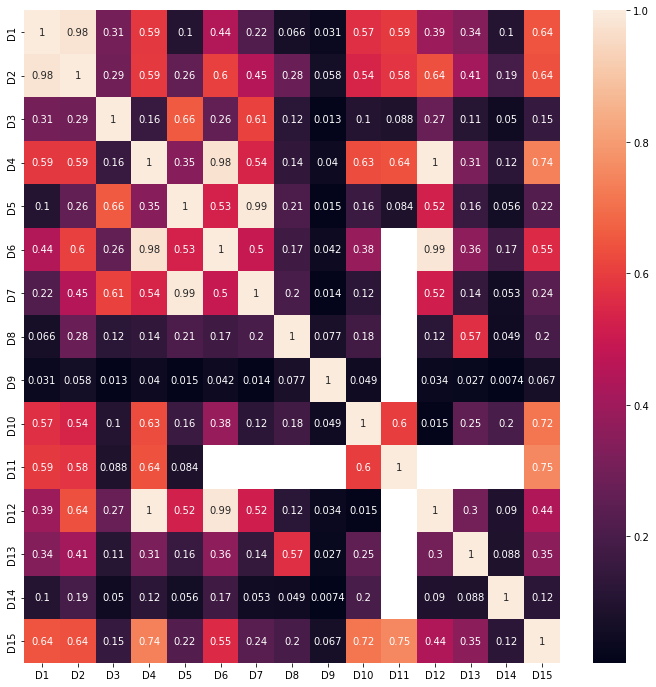

In [51]:
corr2 = df[d_cols].corr()
plt.figure(figsize = (12,12))
ax = sns.heatmap(corr2, annot = True)

These pair of columns have high correlation
* D4, D6
* D1, D2
* D12, D6
* D4, D12

So we can drop any one from these pairs.

In [52]:
del df['D6']
del df['D12']
del df['D2']

In [53]:
df.shape

(618533, 421)

In [54]:
df[['D1', 'D3','D4','D5','D8','D9','D10','D11','D13','D14','D15']].isna().sum()

D1        334
D3     293272
D4     180152
D5     314762
D8     487400
D9     487400
D10     92624
D11    339637
D13    508821
D14    504372
D15    105776
dtype: int64

In [55]:
df[['D3','D4','D5','D8','D9','D10','D11', 'D13','D14','D15']].describe()

D3             D4             D5             D8  \
count  325261.000000  438381.000000  303771.000000  131133.000000   
mean       23.734579     117.572516      32.347574      88.004338   
std        58.047057     178.856176      79.331610     185.904550   
min         0.000000    -122.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.791666   
50%         5.000000       8.000000       4.000000       7.125000   
75%        20.000000     183.000000      23.000000      83.833336   
max       784.000000     869.000000     819.000000    1707.791626   

                  D9            D10            D11            D13  \
count  131133.000000  525909.000000  278896.000000  109712.000000   
mean        0.534143     102.031751     134.530176      10.719994   
std         0.327247     170.764863     180.322141      48.641292   
min         0.000000       0.000000     -29.000000       0.000000   
25%         0.166666       0.000000       0.000000       0.000000   
50%         0.666666       1.000000      30.000000       0.000000   
75%         0.833333     132.000000     242.000000       0.000000   
max         0.958333     876.000000     666.000000     847.000000   

                 D14            D15  
count  114161.000000  512757.000000  
mean       53.643162     137.339635  
std       128.152287     192.618686  
min      -193.000000     -74.000000  
25%         0.000000       0.000000  
50%         0.000000      19.000000  
75%         6.000000     243.000000  
max       878.000000     879.000000

In [56]:
df[['D3','D4','D5','D8','D9','D10','D11','D13','D14','D15']].mode()

D3   D4   D5     D8        D9  D10  D11  D13  D14  D15
0  0.0  0.0  0.0  0.875  0.791666  0.0  0.0  0.0  0.0  0.0

In [57]:
df[['D3','D4','D5','D8','D9','D10','D11','D13','D14','D15']].median()

D3      5.000000
D4      8.000000
D5      4.000000
D8      7.125000
D9      0.666666
D10     1.000000
D11    30.000000
D13     0.000000
D14     0.000000
D15    19.000000
dtype: float64

We can clearly see that all of these columns are highly skewed as the mean is not even close to the 50 percentile.
As these are related to time intervals, we will use the median value to replace with all the nan values.

In [58]:
df[['D1','D3','D4','D5','D8','D9','D10','D11','D13','D14','D15']] = my_imputer.fit_transform(df[['D1','D3','D4','D5','D8','D9','D10','D11','D13','D14','D15']])

In [59]:
df[['D1','D3','D4','D5','D8','D9','D10','D11','D13','D14','D15']].isna().sum()

D1     0
D3     0
D4     0
D5     0
D8     0
D9     0
D10    0
D11    0
D13    0
D14    0
D15    0
dtype: int64

In [60]:
d_cols

['D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15']

In [61]:
c_cols = [col for col in train_df.columns if col[0] == 'C' and len(col) <=3]
m_cols = [col for col in df.columns if col[0] == 'M' and len(col) <=2]
v_cols = [col for col in df.columns if col[0] == 'V' and len(col) <=4]
id_cols = [col for col in df.columns if col[0] == 'i' and len(col) <=5]


In [62]:
df[c_cols].head(10)

C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12   C13  C14
0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0   1.0  1.0
1  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   1.0  1.0
2  5.0  4.0  0.0  0.0  0.0  2.0  0.0  0.0  3.0  0.0  2.0  0.0   5.0  3.0
3  1.0  1.0  0.0  0.0  1.0  2.0  0.0  0.0  1.0  0.0  1.0  0.0  12.0  1.0
4  2.0  3.0  0.0  0.0  0.0  2.0  0.0  0.0  2.0  0.0  1.0  1.0   7.0  2.0
5  1.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  1.0  20.0  1.0
6  1.0  1.0  0.0  0.0  1.0  2.0  0.0  0.0  2.0  0.0  2.0  0.0  22.0  1.0
7  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   7.0  1.0
8  9.0  6.0  0.0  0.0  3.0  4.0  0.0  0.0  5.0  0.0  7.0  0.0  14.0  7.0
9  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0

In [63]:
df[m_cols].head(10)

M1   M2   M3   M4   M5   M6   M7   M8   M9
0  NaN  NaN  NaN   M2  NaN  NaN  NaN  NaN  NaN
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2    T    T    F   M0    T    F    F    T    T
3    T    T    T  NaN  NaN    T    F    F    T
4    T    T    F   M0    T    F    F    F    T
5    T    T    T   M0    F    T  NaN  NaN  NaN
6    T    T    T  NaN  NaN    F    F    F    F
7    T    T    T  NaN  NaN    F    F    F    T
8    T    T    T  NaN  NaN    F  NaN  NaN  NaN
9    T    T    F   M0    F    T  NaN  NaN  NaN

In [64]:
df[m_cols].isna().sum()

M1    331640
M2    331640
M3    331640
M4    250818
M5    375557
M6    236755
M7    399562
M8    399553
M9    399553
dtype: int64

In [65]:
df['M1'].fillna(df['M1'].mode()[0], inplace=True)
df['M2'].fillna(df['M2'].mode()[0], inplace=True)
df['M3'].fillna(df['M3'].mode()[0], inplace=True)
df['M4'].fillna(df['M4'].mode()[0], inplace=True)
df['M5'].fillna(df['M5'].mode()[0], inplace=True)
df['M6'].fillna(df['M6'].mode()[0], inplace=True)
df['M7'].fillna(df['M7'].mode()[0], inplace=True)
df['M8'].fillna(df['M8'].mode()[0], inplace=True)
df['M9'].fillna(df['M9'].mode()[0], inplace=True)

In [66]:
df[v_cols].head(10)

V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
4  1.0  2.0  2.0  2.0  2.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   
5  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
6  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
7  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
8  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
9  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   

   V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0   
4  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0   
7  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0   
8  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0   
9  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  \
0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
6  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
7  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
9  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   

   V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  \
0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
5  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
6  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
7  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
8  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
9  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V61  V62  V63  V64  V65  V66  V67  V68  V69  V70  V71  V72  V73  V74  V75  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
4  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   


In [67]:
nan_dict = {}
for col in v_cols:
    count = df[col].isnull().sum()
    try:
        nan_dict[count].append(col)
    except:
        nan_dict[count] = [col]
        
for k,v in nan_dict.items():
    print("")
    print(f'NAN count = {k} percent: {(int(k)/df.shape[0])*100} %')
    print(v)
    
print("")
print("Number of groups formed in v columns:")
print(len(nan_dict))


NAN count = 339637 percent: 54.9100856381147 %
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']

NAN count = 92677 percent: 14.983355778915595 %
['V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34']

NAN count = 180180 percent: 29.13021617278302 %
['V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52']

NAN count = 99278 percent: 16.050558337226956 %
['V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74']

NAN count = 105808 percent: 17.106282122376655 %
['V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94']

NAN count = 68 percent: 0.010993754577362888 %
['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', '

In [68]:
def reduction(grps):
    use = []
    for col in grps:
        max_unique = 0
        max_index = 0
        for i,c in enumerate(col):
            n = df[c].nunique()
            if n > max_unique:
                max_unique = n
                max_index = i
        use.append(col[max_index])
    return use

## Group1 [V1 to V11]

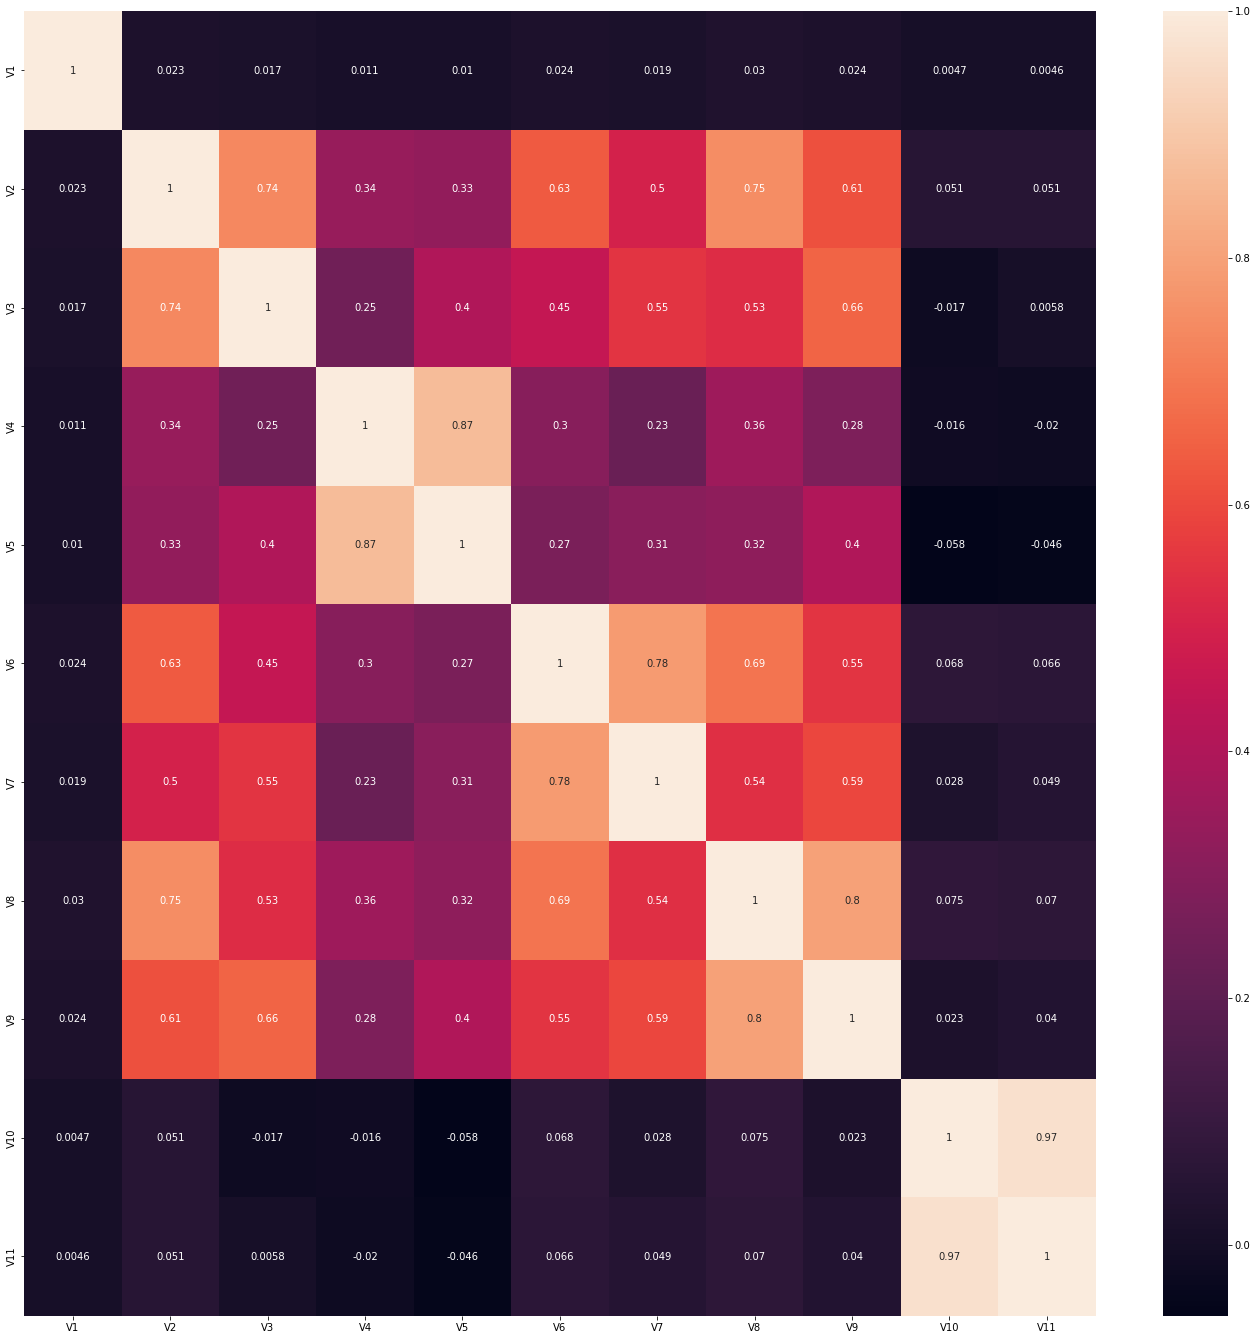

In [69]:
g1 = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']
corr = df[g1].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [70]:
pairs = [['V1'],['V2','V3'],['V4','V5'],['V6','V7'],['V8','V9'],['V10','V11']]
g1 = reduction(pairs)
g1

['V1', 'V3', 'V4', 'V6', 'V8', 'V11']

## Group2 [V12 - V34]

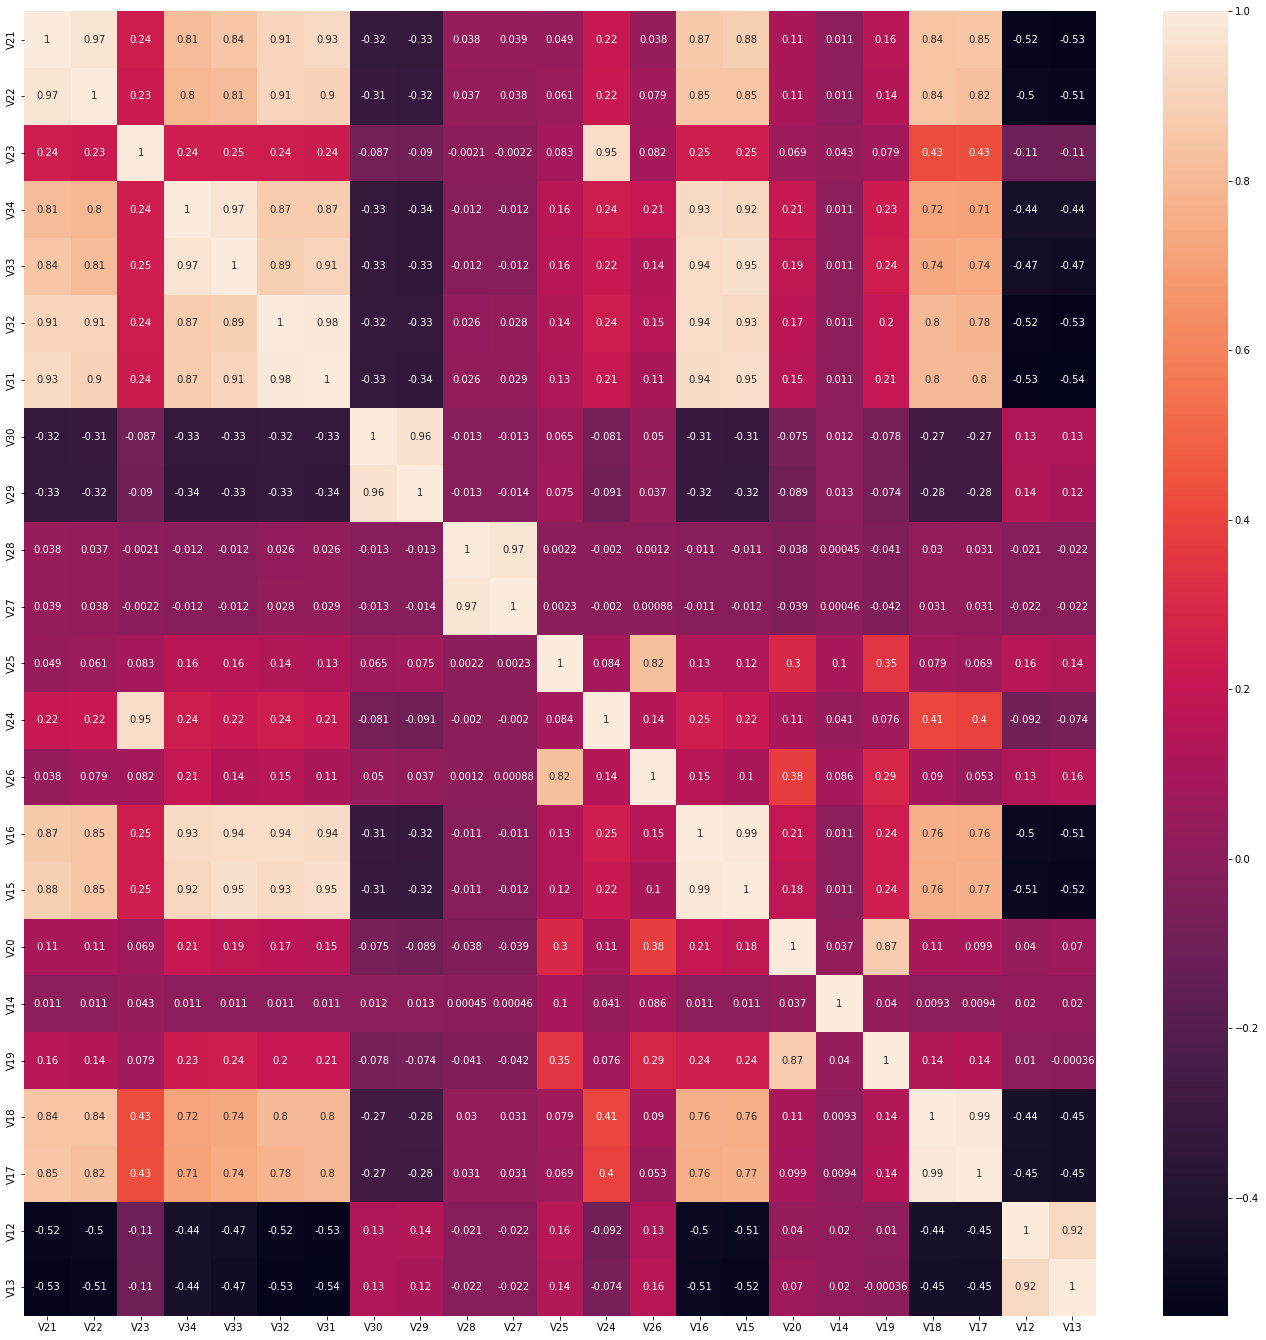

In [71]:
g2 = ['V21', 'V22', 'V23', 'V34', 'V33', 'V32','V31', 'V30', 'V29', 'V28', 'V27', 'V25', 'V24', 'V26', 'V16', 'V15', 
      'V20', 'V14', 'V19', 'V18', 'V17', 'V12', 'V13']
corr = df[g2].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [72]:
pairs = [['V12','V13'],['V14'],['V15','V16','V17','V18','V21','V22','V31','V32','V33','V34'],['V19','V20'],
         ['V23','V24'],['V25','V26'],['V27','V28'],['V29','V30']]

g2 = reduction(pairs)
g2

['V13', 'V14', 'V17', 'V20', 'V23', 'V26', 'V27', 'V30']

## Group3 [V35 - V52]

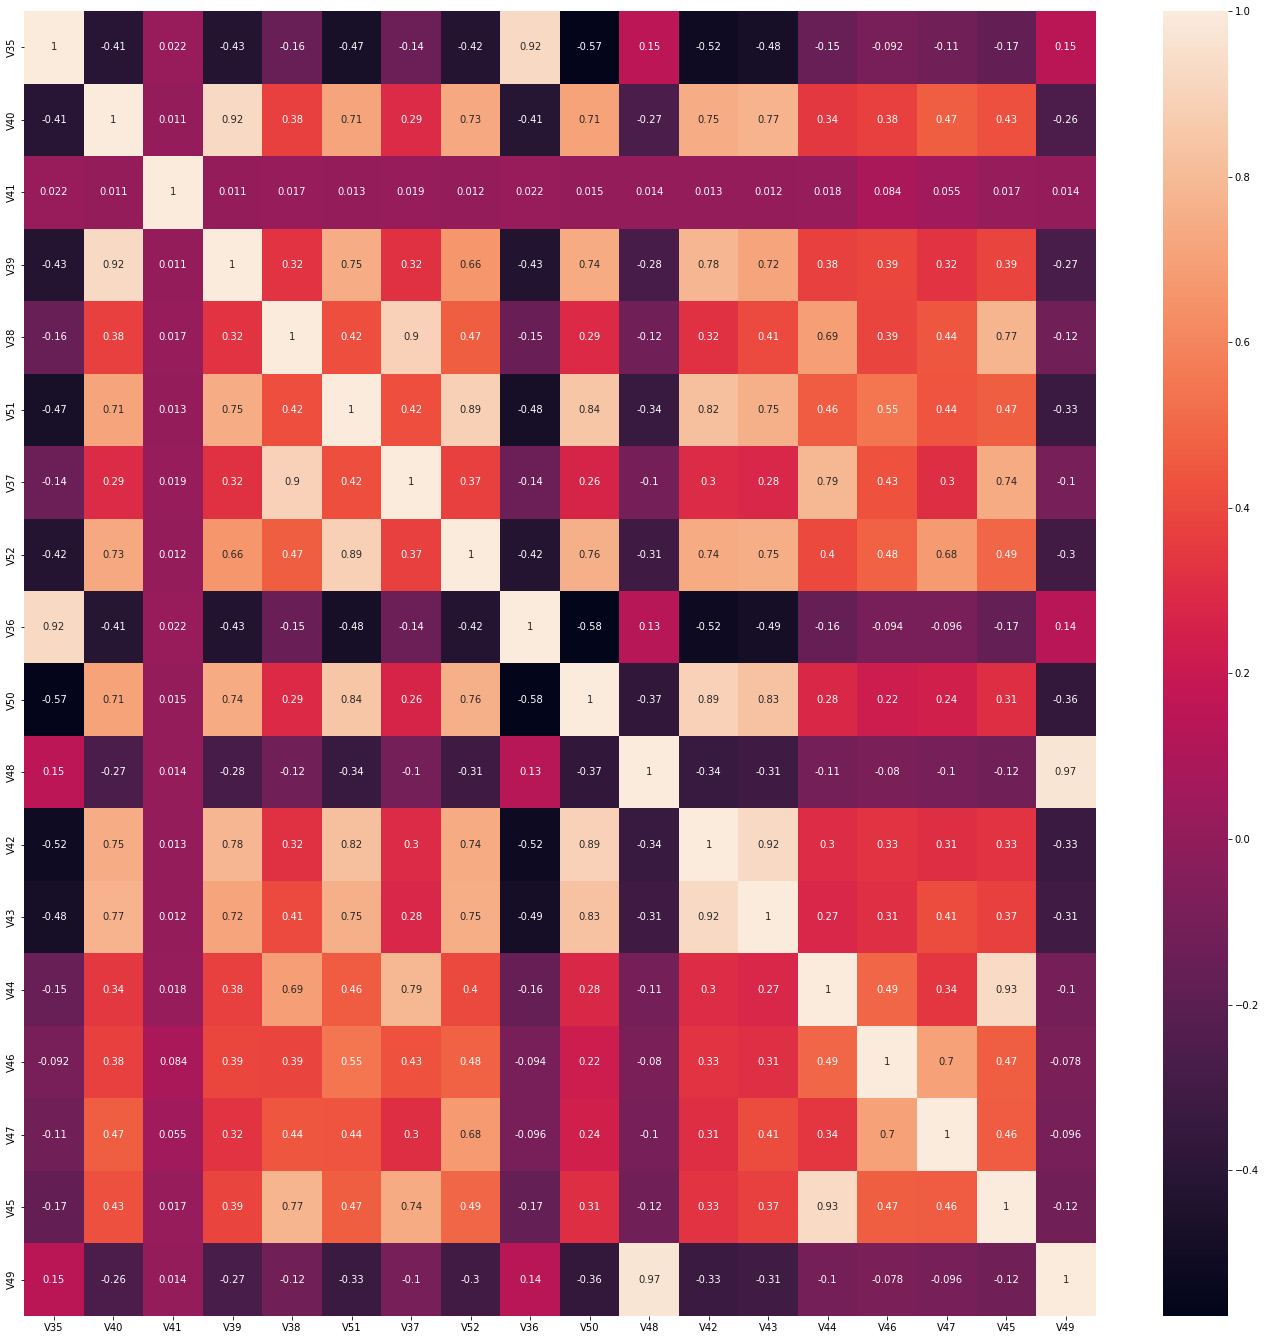

In [73]:
g3 = ['V35', 'V40', 'V41', 'V39', 'V38', 'V51', 'V37', 'V52', 'V36', 'V50', 'V48', 'V42',
 'V43', 'V44', 'V46', 'V47', 'V45', 'V49']

corr = df[g3].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)


In [74]:
pairs = [['V35','V36'],['V37','V38'],['V39','V40','V42','V43','V50','V51','V52'],['V41'],
         ['V44','V45'],['V46','V47'],['V48','V49']]

g3 = reduction(pairs)
g3


['V36', 'V37', 'V40', 'V41', 'V44', 'V47', 'V48']

## Group4 [V52-V74]

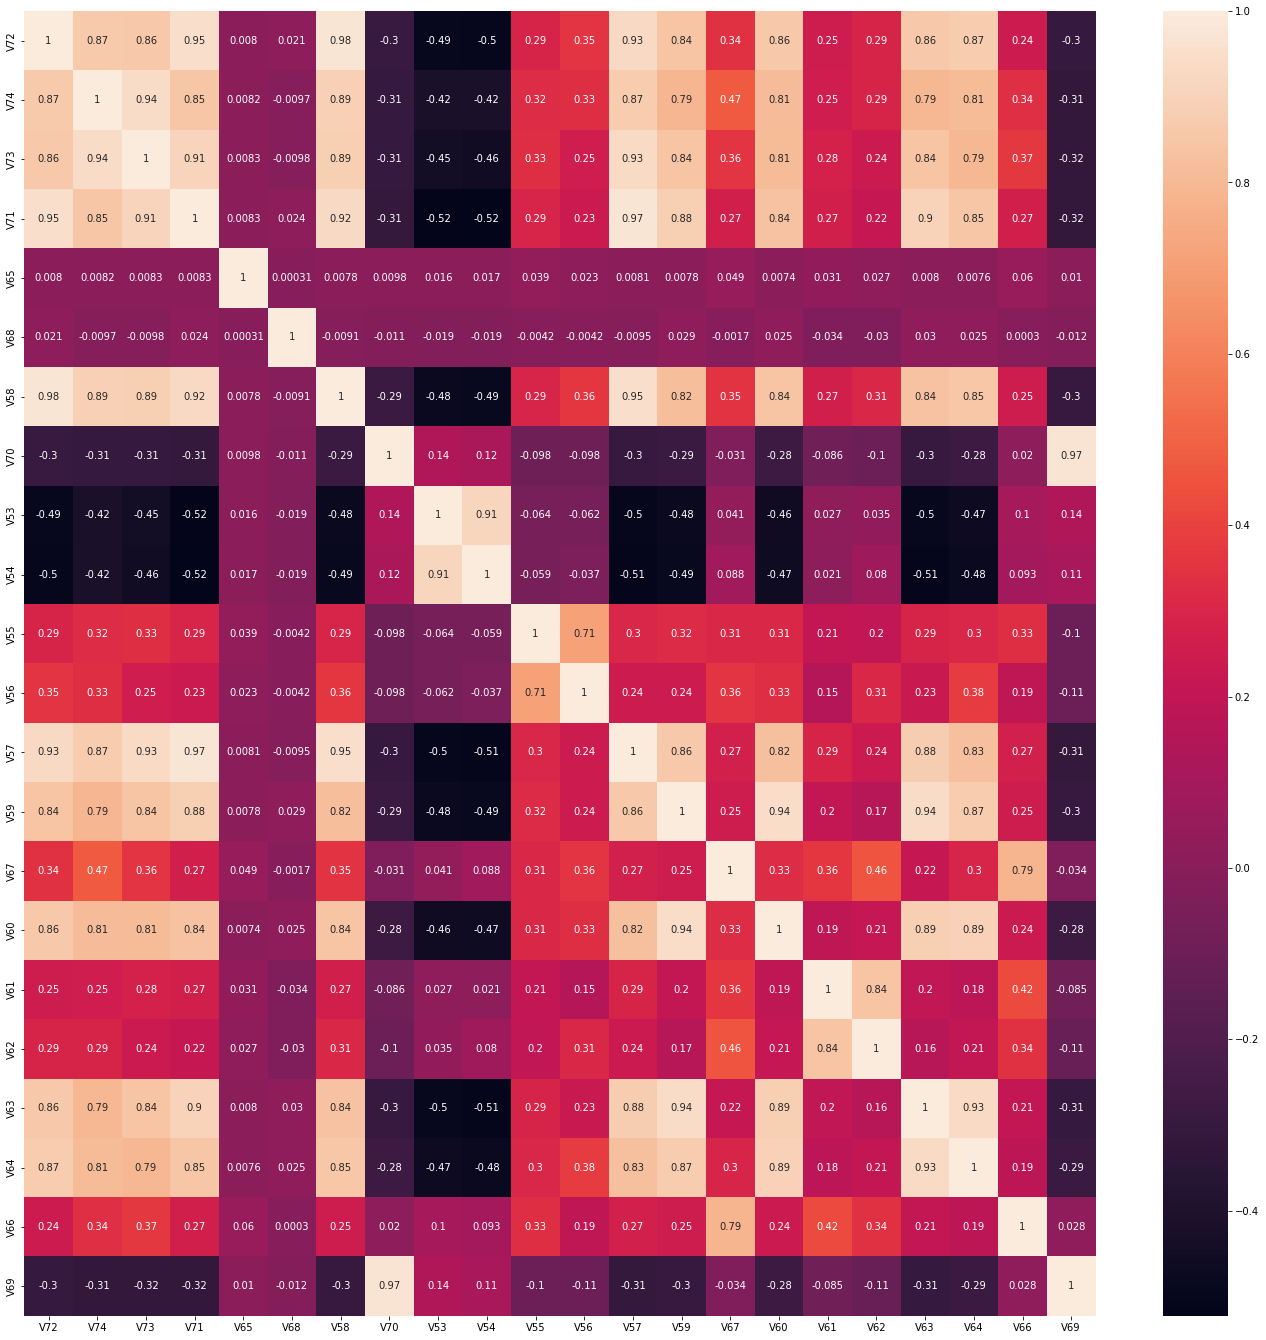

In [75]:
g4 = ['V72', 'V74', 'V73', 'V71', 'V65', 'V68', 'V58', 'V70', 'V53', 
 'V54', 'V55', 'V56', 'V57', 'V59', 'V67', 'V60', 'V61',
 'V62', 'V63', 'V64', 'V66', 'V69']

corr = df[g4].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)


In [76]:
pairs = [['V53','V54'],['V55'],['V56'],['V57', 'V58', 'V59', 'V60', 'V63', 'V64', 'V71', 'V72', 'V73', 'V74'],['V61','V62'],
 ['V65'],['V66','V67'],['V68'],['V69','V70']]

g4 = reduction(pairs)
g4


['V54', 'V55', 'V56', 'V59', 'V62', 'V65', 'V67', 'V68', 'V70']

## Group5 [V75 - V94]

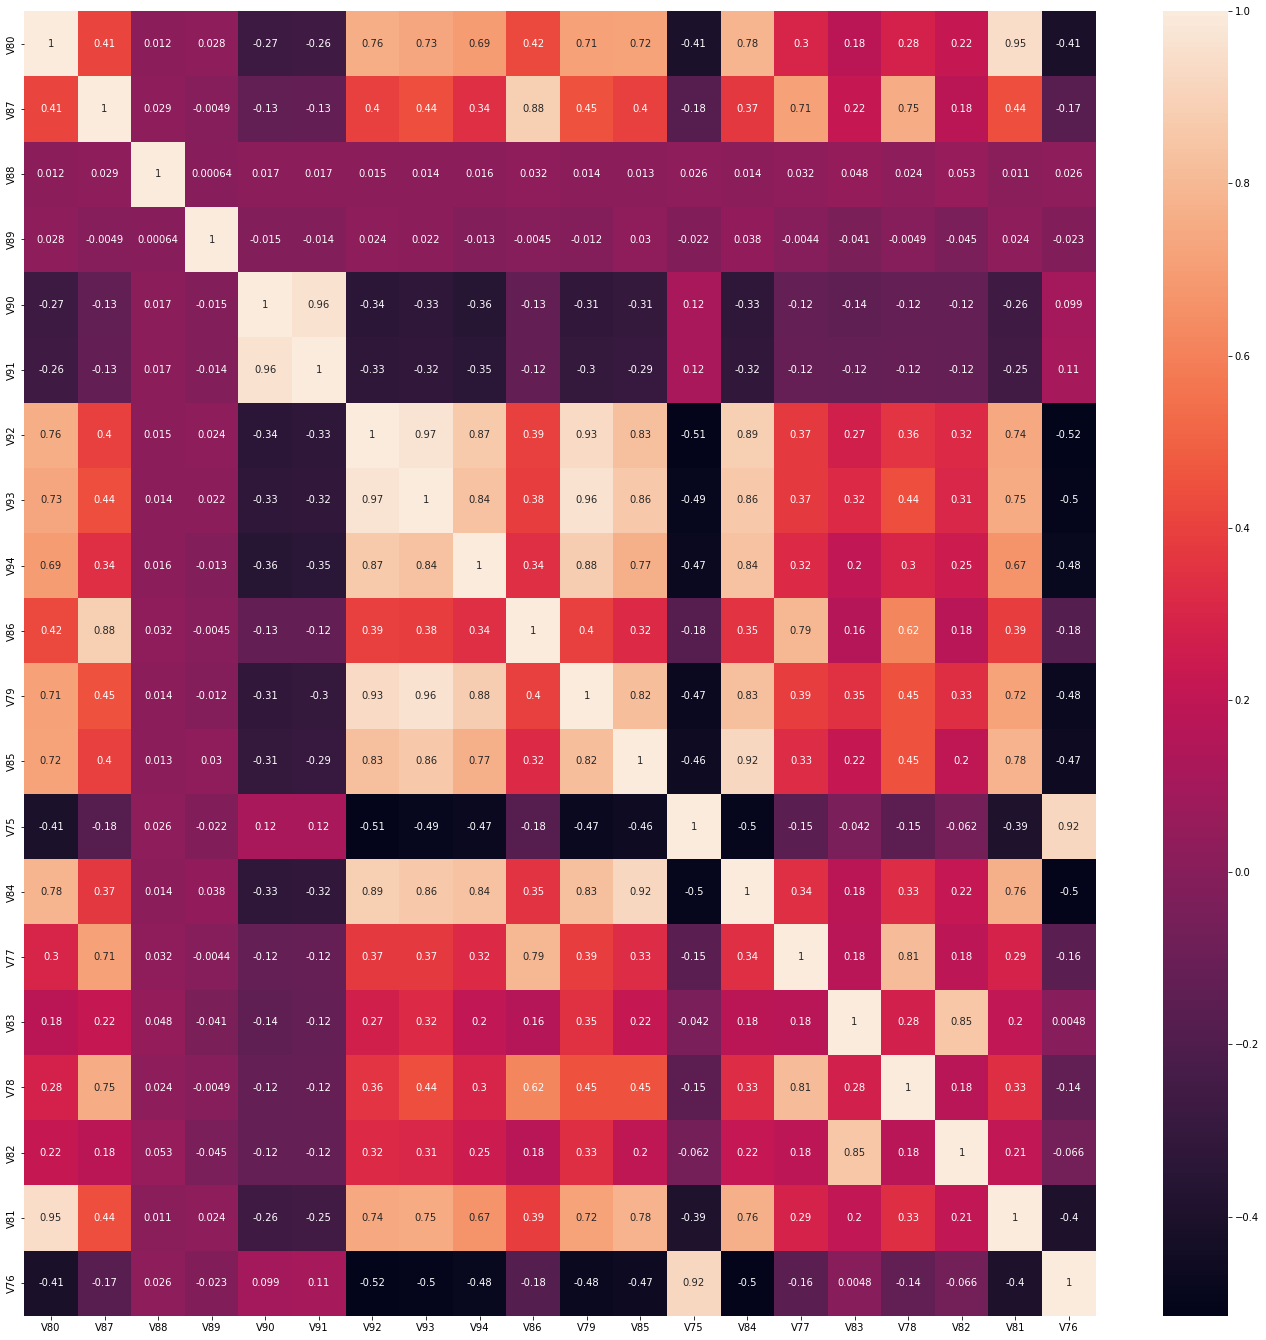

In [77]:
g5 = ['V80', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V86', 'V79',
 'V85', 'V75', 'V84', 'V77', 'V83', 'V78', 'V82', 'V81', 'V76']

corr = df[g5].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [78]:
pairs = [['V75','V76'],['V77','V78'],['V79','V80','V81','V84','V85','V92','V93','V94'],['V82','V83'],['V86','V87'],
         ['V88'],['V89'],['V90','V91']]

g5 = reduction(pairs)
g5

['V76', 'V78', 'V80', 'V82', 'V86', 'V88', 'V89', 'V91']

## Group6 [V95 - V137]

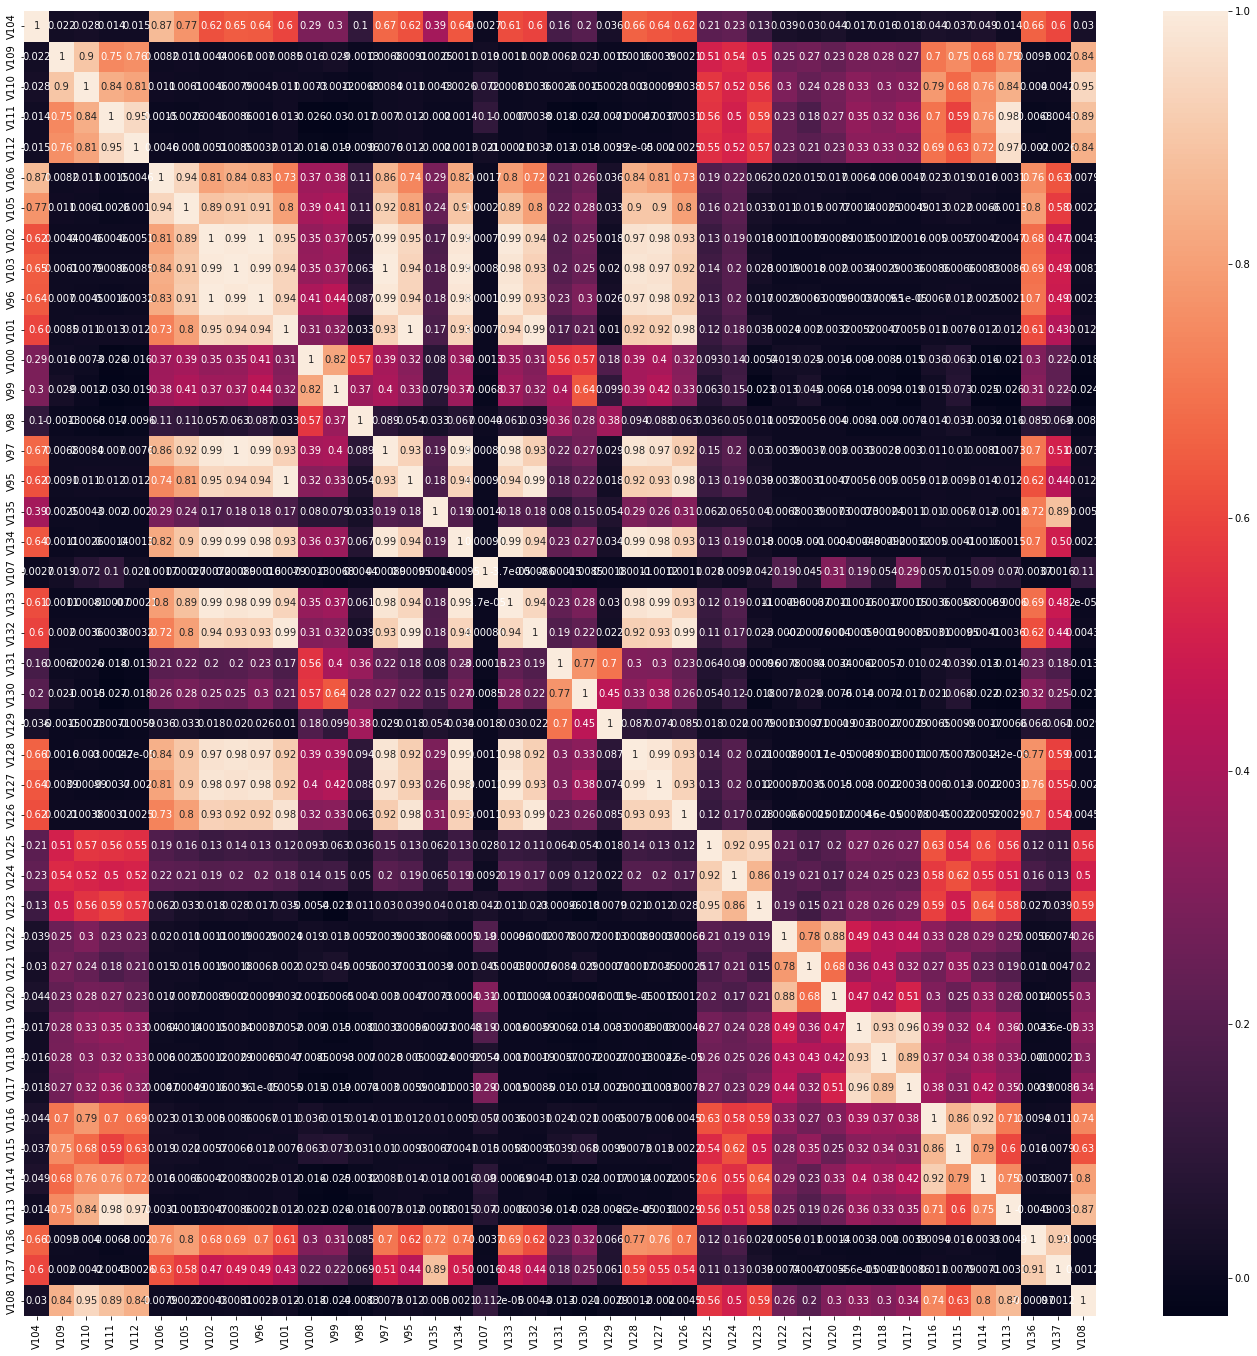

In [79]:
g6 = ['V104', 'V109', 'V110', 'V111', 'V112', 'V106', 'V105', 'V102', 'V103', 'V96', 'V101', 'V100',
        'V99', 'V98', 'V97', 'V95', 'V135', 'V134', 'V107', 'V133', 'V132', 'V131', 'V130', 'V129', 
        'V128', 'V127', 'V126', 'V125', 'V124', 'V123', 'V122', 'V121', 
        'V120', 'V119', 'V118', 'V117', 'V116', 'V115', 'V114', 'V113', 'V136', 'V137', 'V108']

corr = df[g6].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

As this is a large group, we will further reduce it to 3 small groups

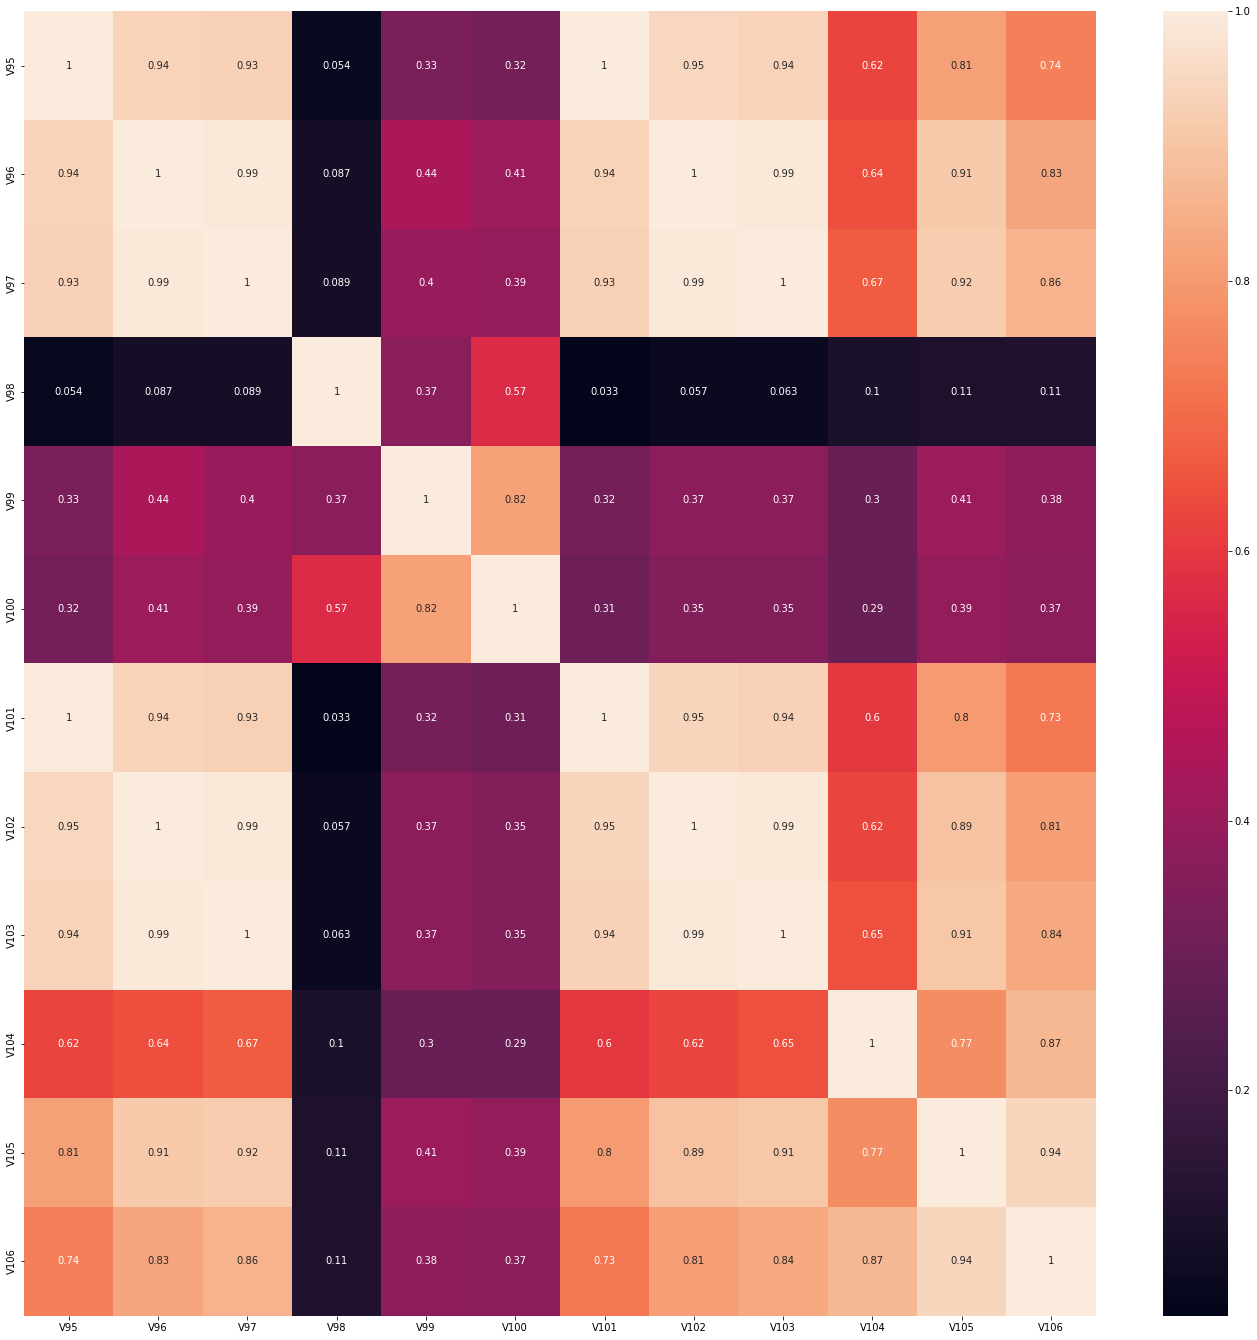

In [80]:
g6_1 = ['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106']

corr = df[g6_1].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [81]:
pairs = [['V99','V100'],['V98'],['V104'],['V95','V96','V97','V101','V102','V103','V105','V106']]

g6_1 = reduction(pairs)
g6_1

['V99', 'V98', 'V104', 'V96']

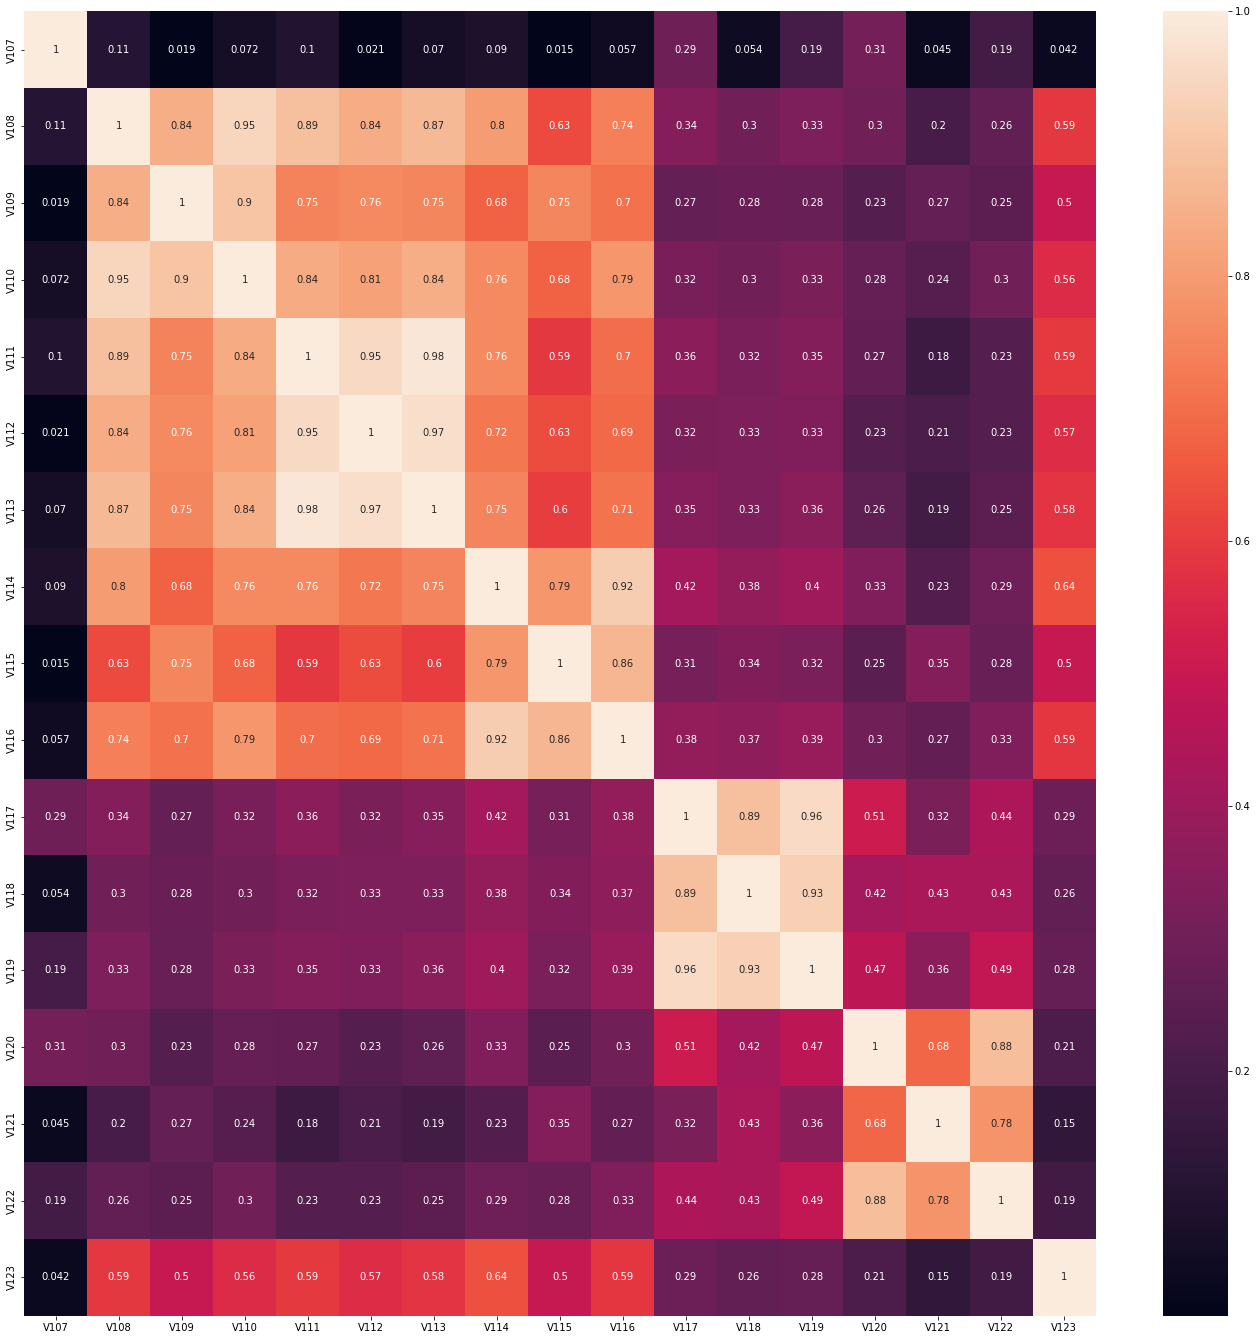

In [82]:
g6_2 = ['V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123']

corr = df[g6_2].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [83]:
pairs = [['V107'],['V108','V109','V110','V114'],['V111','V112','V113'],['V115','V116'],['V117','V118','V119'],['V120','V122'],['V121'],['V123']]

g6_2 = reduction(pairs)
g6_2

['V107', 'V108', 'V111', 'V115', 'V117', 'V120', 'V121', 'V123']

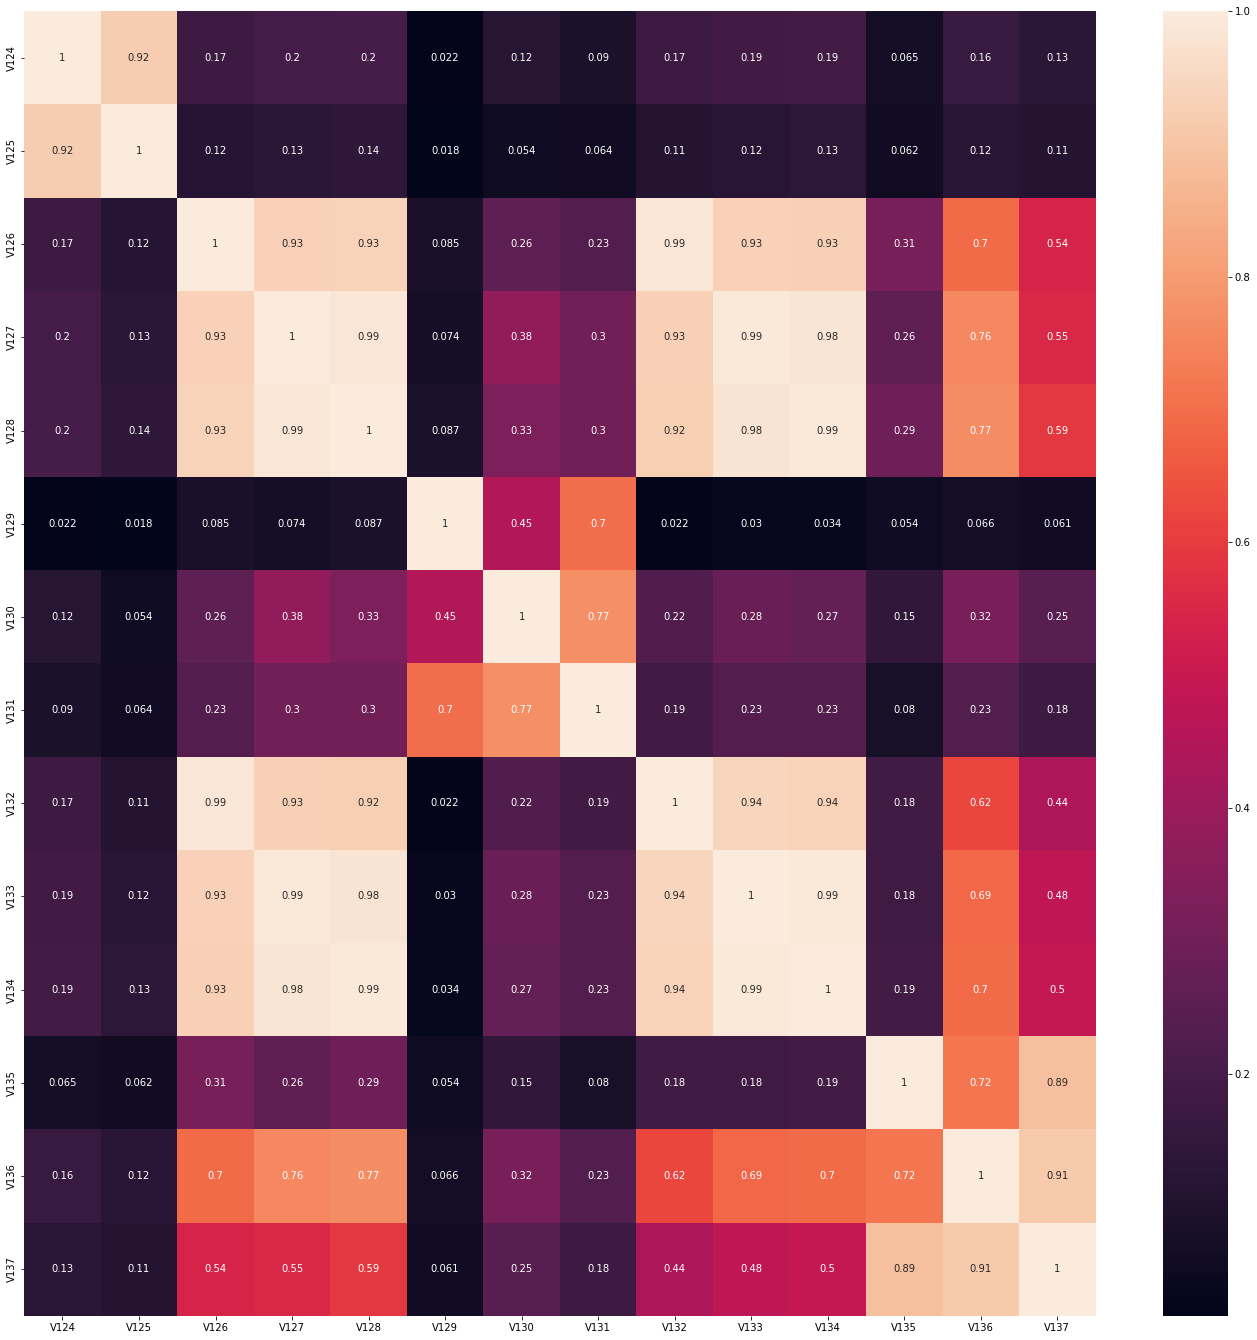

In [84]:
g6_3 = ['V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137']

corr = df[g6_3].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [85]:
pairs = [['V124','V125'],['V126','V127','V128','V132','V133','V134'],['V129'],['V130','V131'],['V135','V136','V137']]

g6_3 = reduction(pairs)
g6_3

['V124', 'V127', 'V129', 'V130', 'V136']

## Group7 [V138 ~ V163]

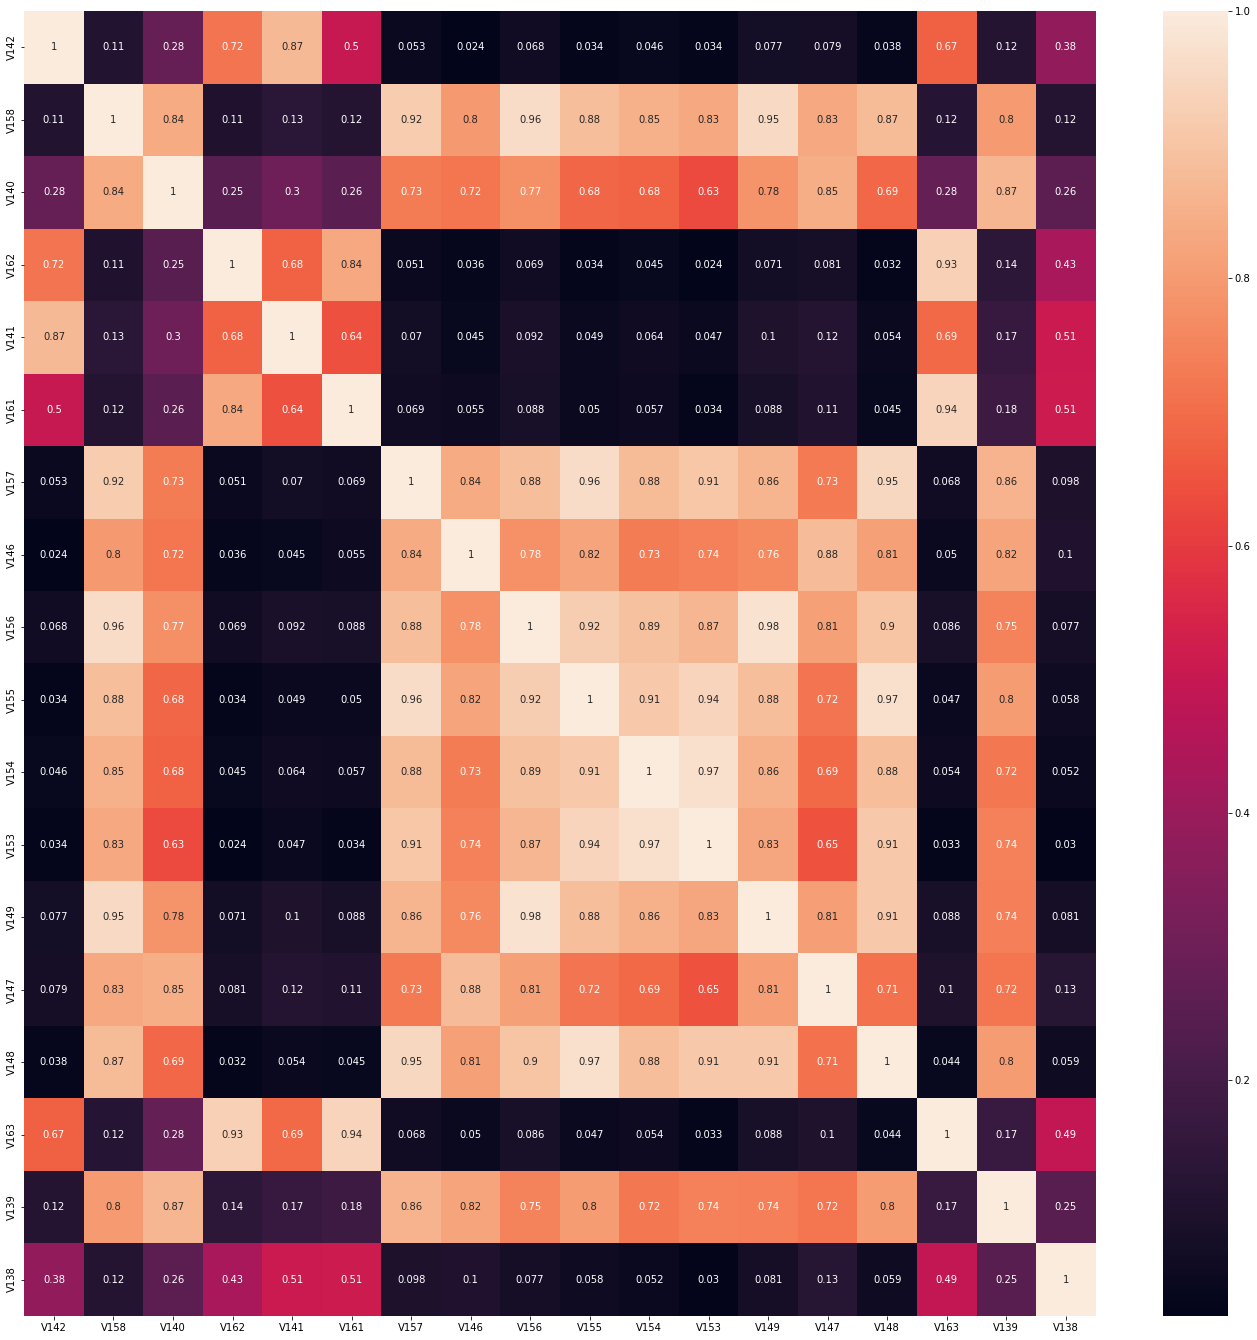

In [86]:
g7 = ['V142', 'V158', 'V140', 'V162', 'V141', 'V161', 'V157', 'V146', 'V156', 'V155', 'V154',
        'V153', 'V149', 'V147', 'V148', 'V163', 'V139', 'V138']

corr = df[g7].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [87]:
pairs = [['V138'],['V139','V140'],['V141','V142'],['V146','V147'],['V148','V149','V153','V154','V156','V157','V158'],['V161','V162','V163']]

g7 = reduction(pairs)
g7

['V138', 'V139', 'V142', 'V147', 'V156', 'V162']

##  Group8 [V143 ~ V166]

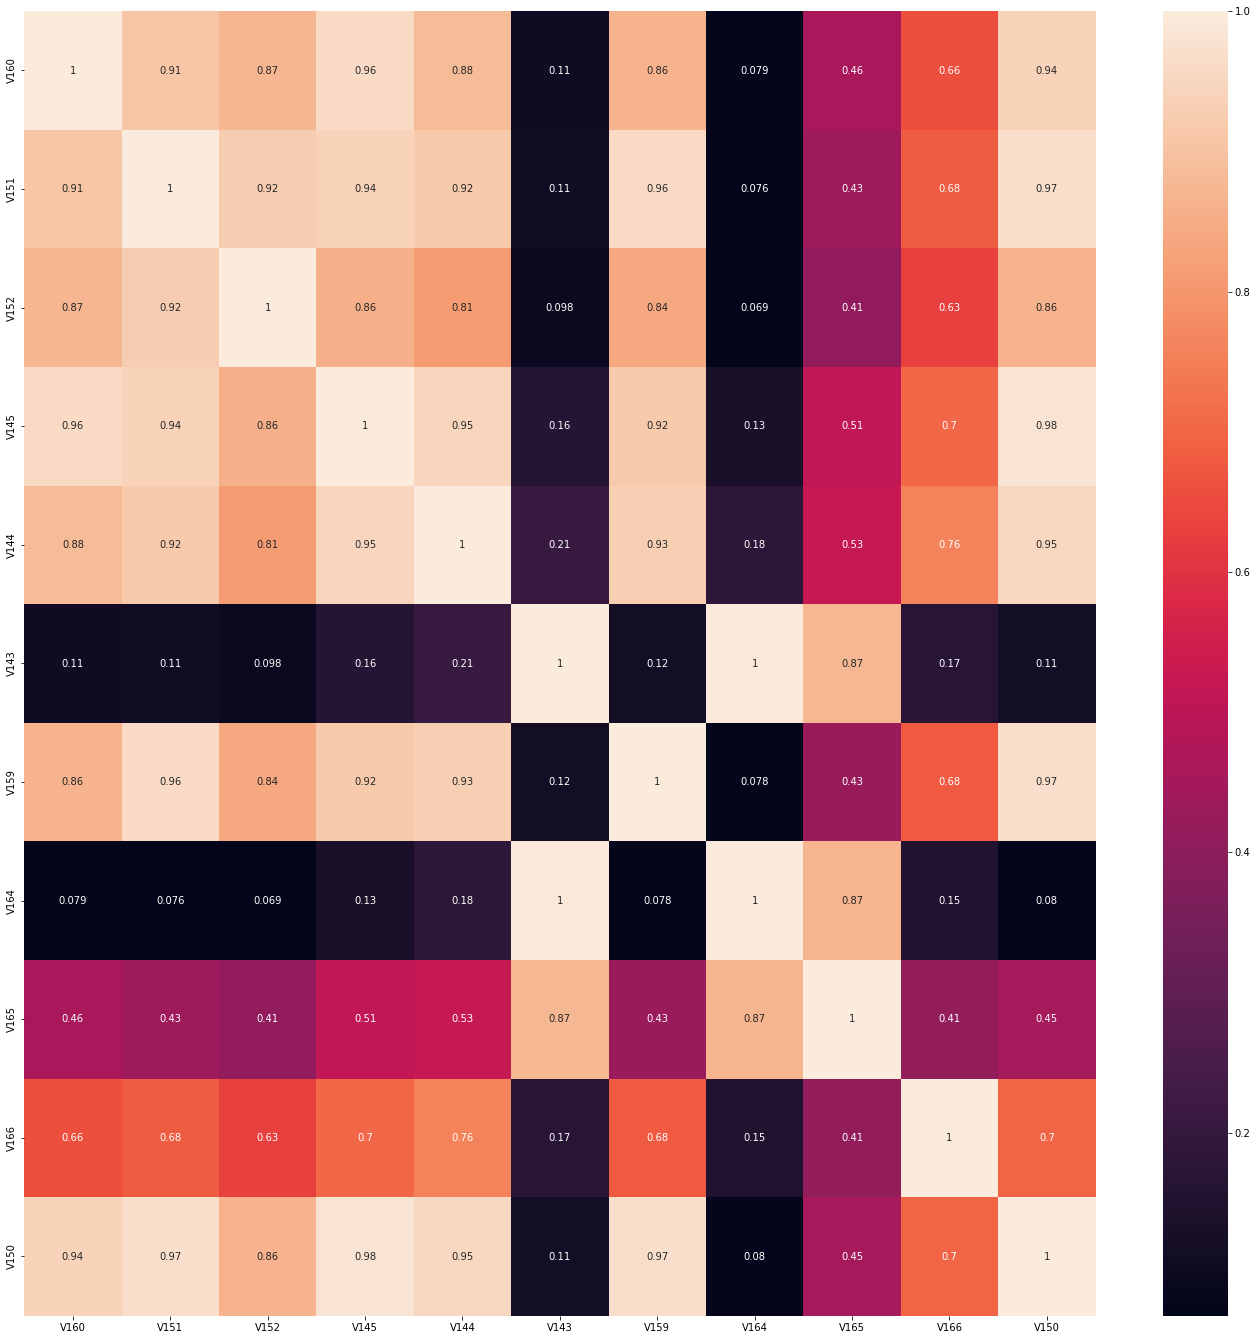

In [88]:
g8 = ['V160', 'V151', 'V152', 'V145', 'V144', 'V143', 'V159', 'V164', 'V165', 'V166', 'V150']

corr = df[g8].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [89]:
pairs = [['V143','V164','V165'],['V144','V145','V150','V151','V152','V159','V160'],['V166']]

g8 = reduction(pairs)
g8

['V165', 'V160', 'V166']

## Group9 [V167 ~ V216]

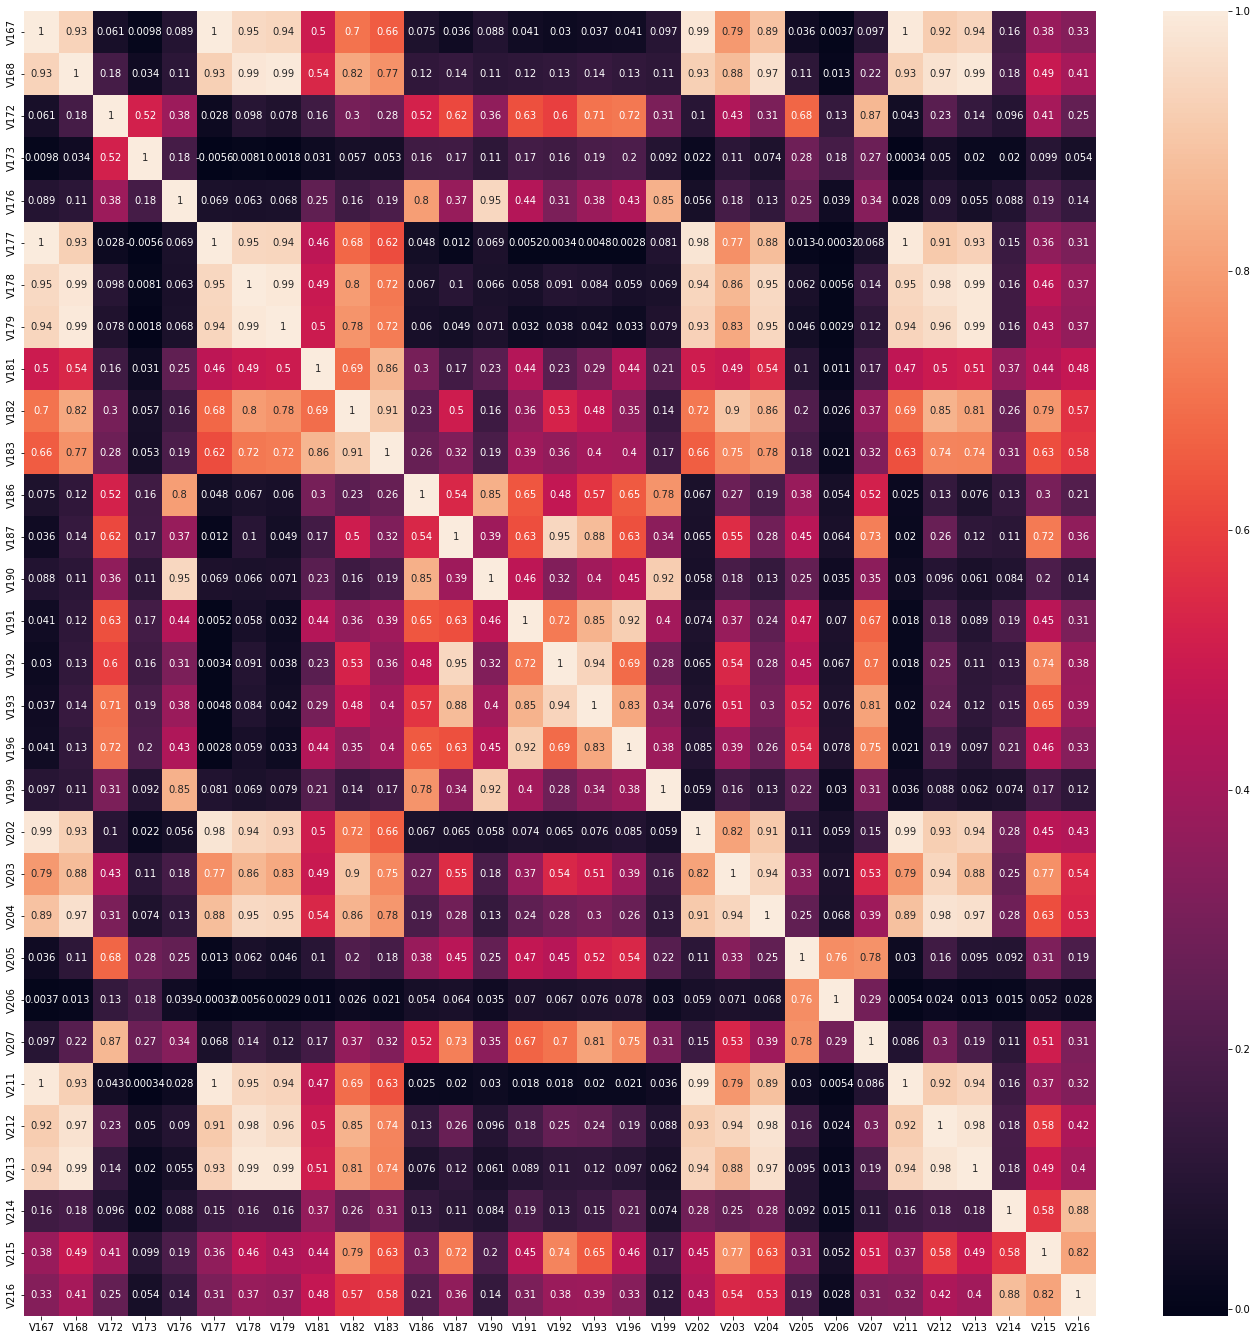

In [90]:
g9 = ['V167', 'V168', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182', 'V183', 'V186', 
      'V187', 'V190', 'V191', 'V192', 'V193', 'V196', 'V199', 'V202', 'V203', 'V204', 'V205', 'V206', 
      'V207', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216']

corr = df[g9].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

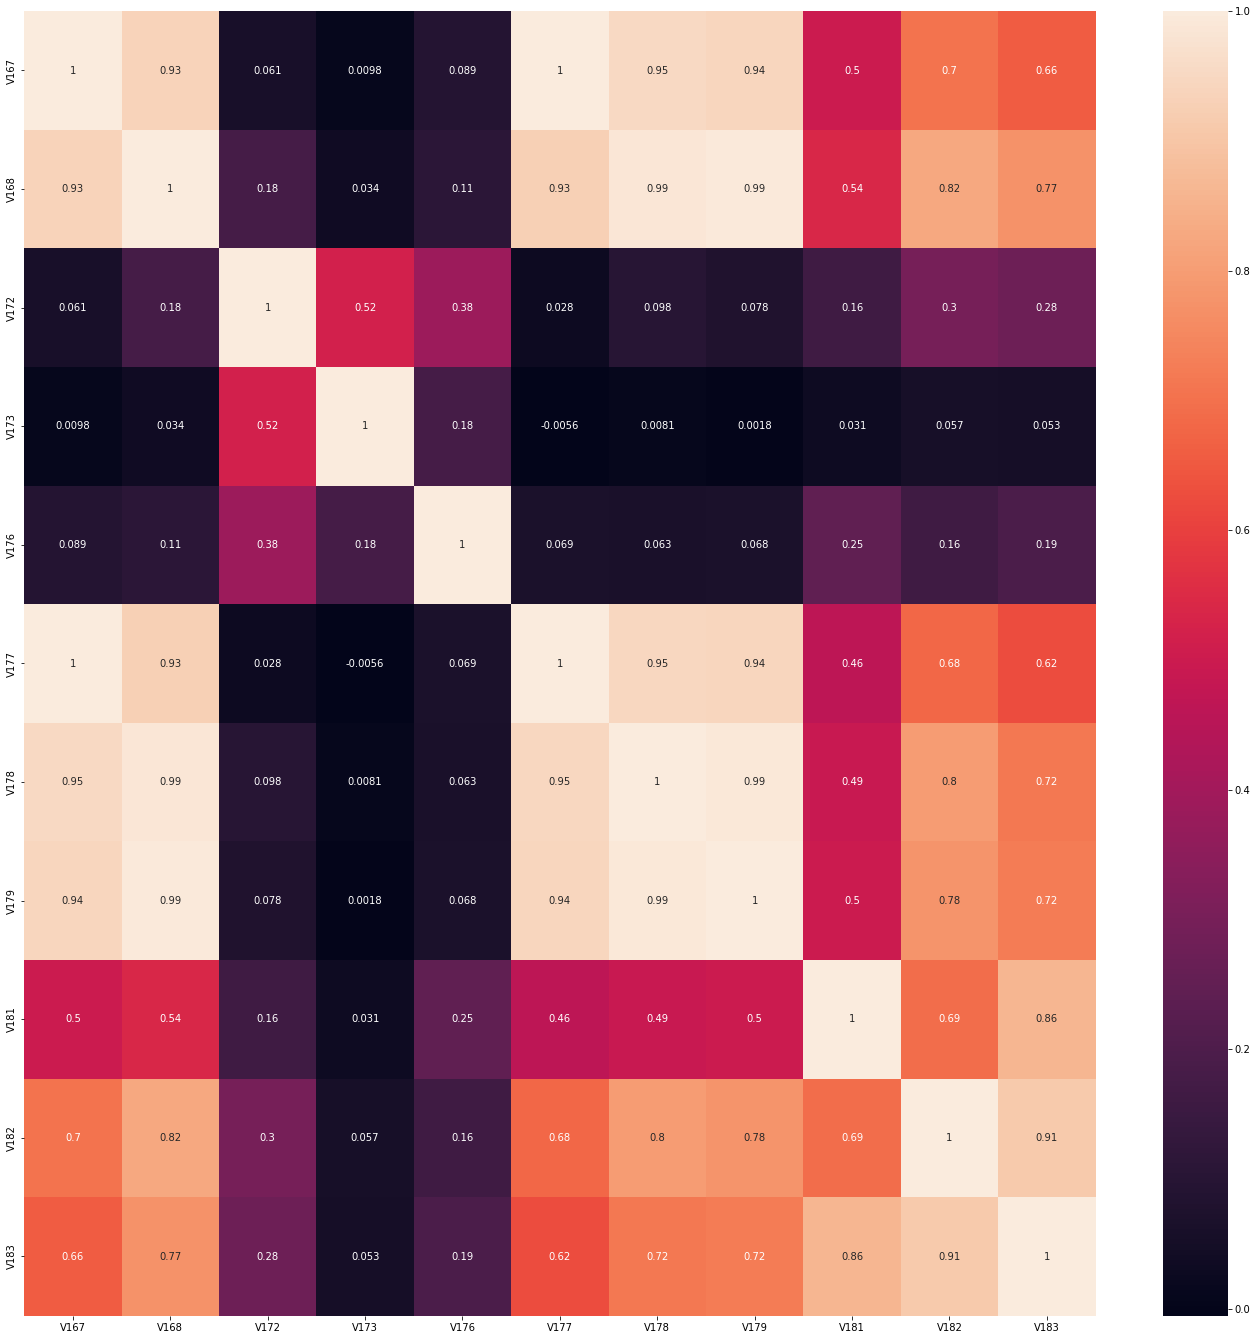

In [91]:
g9_1 = ['V167', 'V168','V172','V173','V176','V177','V178','V179','V181','V182','V183']

corr = df[g9_1].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [92]:
pairs = [['V167','V168','V177','V178','V179'],['V172','V176'],['V173'],['V181','V182','V183']]

g9_1 = reduction(pairs)
g9_1

['V178', 'V176', 'V173', 'V182']

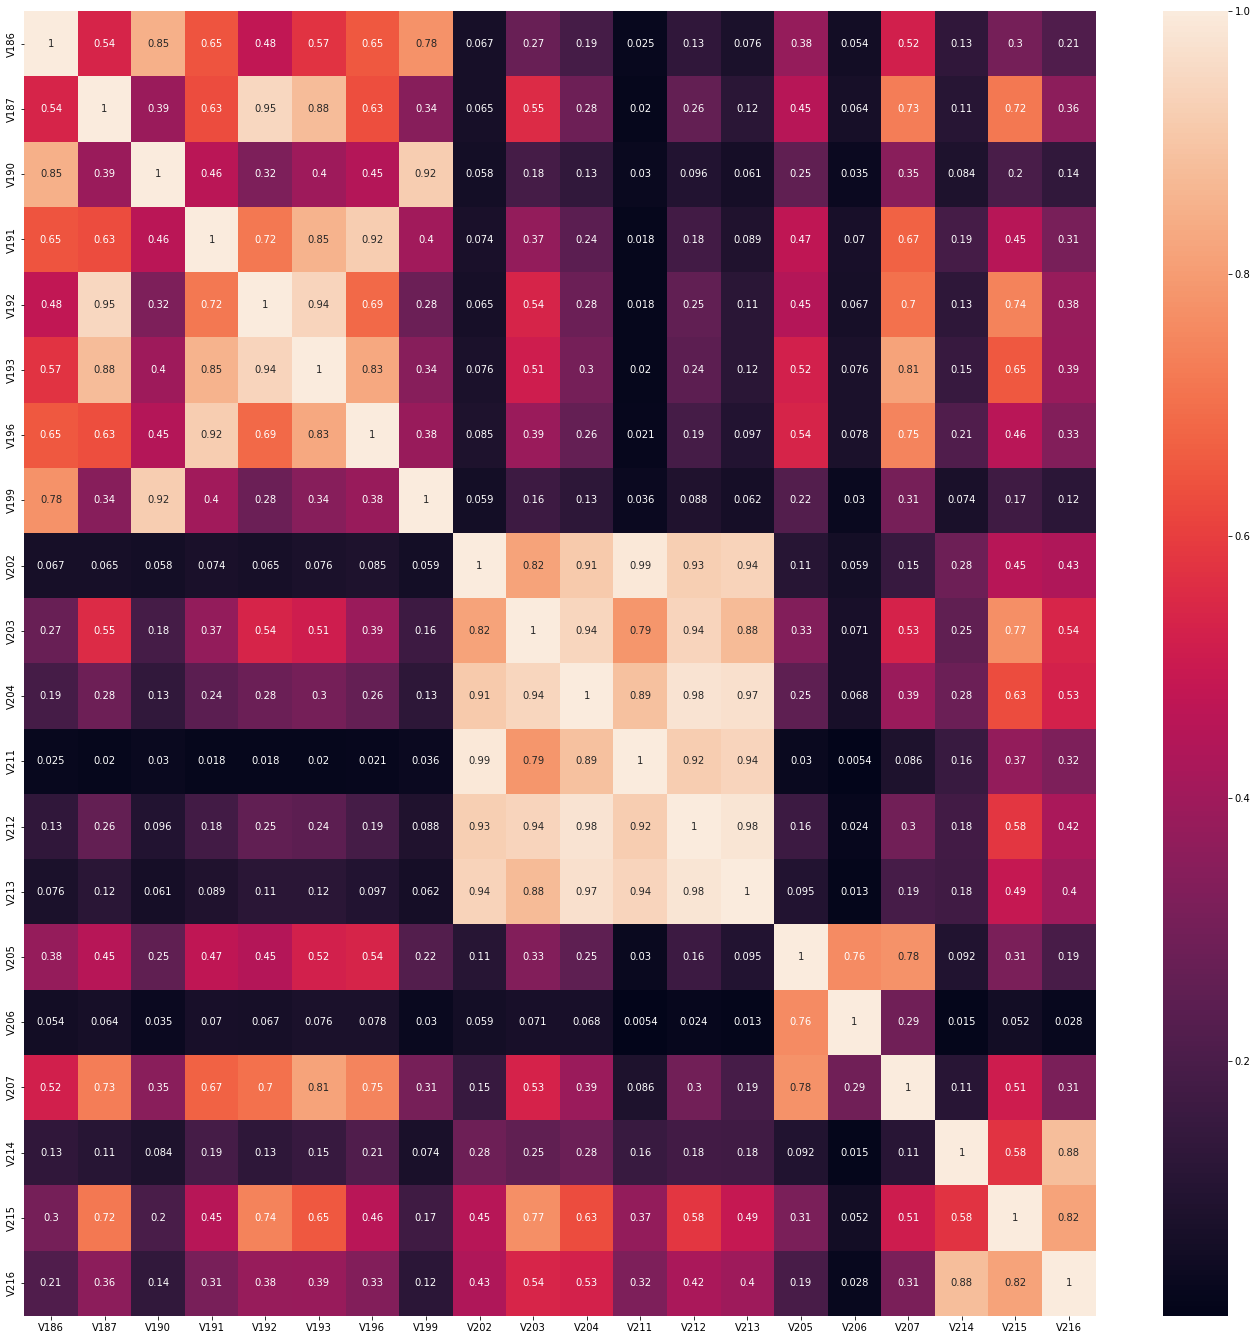

In [93]:
g9_2 = ['V186','V187','V190','V191','V192','V193','V196','V199','V202','V203','V204','V211','V212','V213','V205','V206','V207','V214','V215','V216']

corr = df[g9_2].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [94]:
pairs = [['V186','V187','V190','V191','V192','V193','V196','V199'],['V202','V203','V204','V211','V212','V213'],
         ['V205','V206'],['V207'],['V214','V215','V216']]

g9_2 = reduction(pairs)
g9_2

['V187', 'V203', 'V205', 'V207', 'V215']

## Group10 [V169 ~ V210]

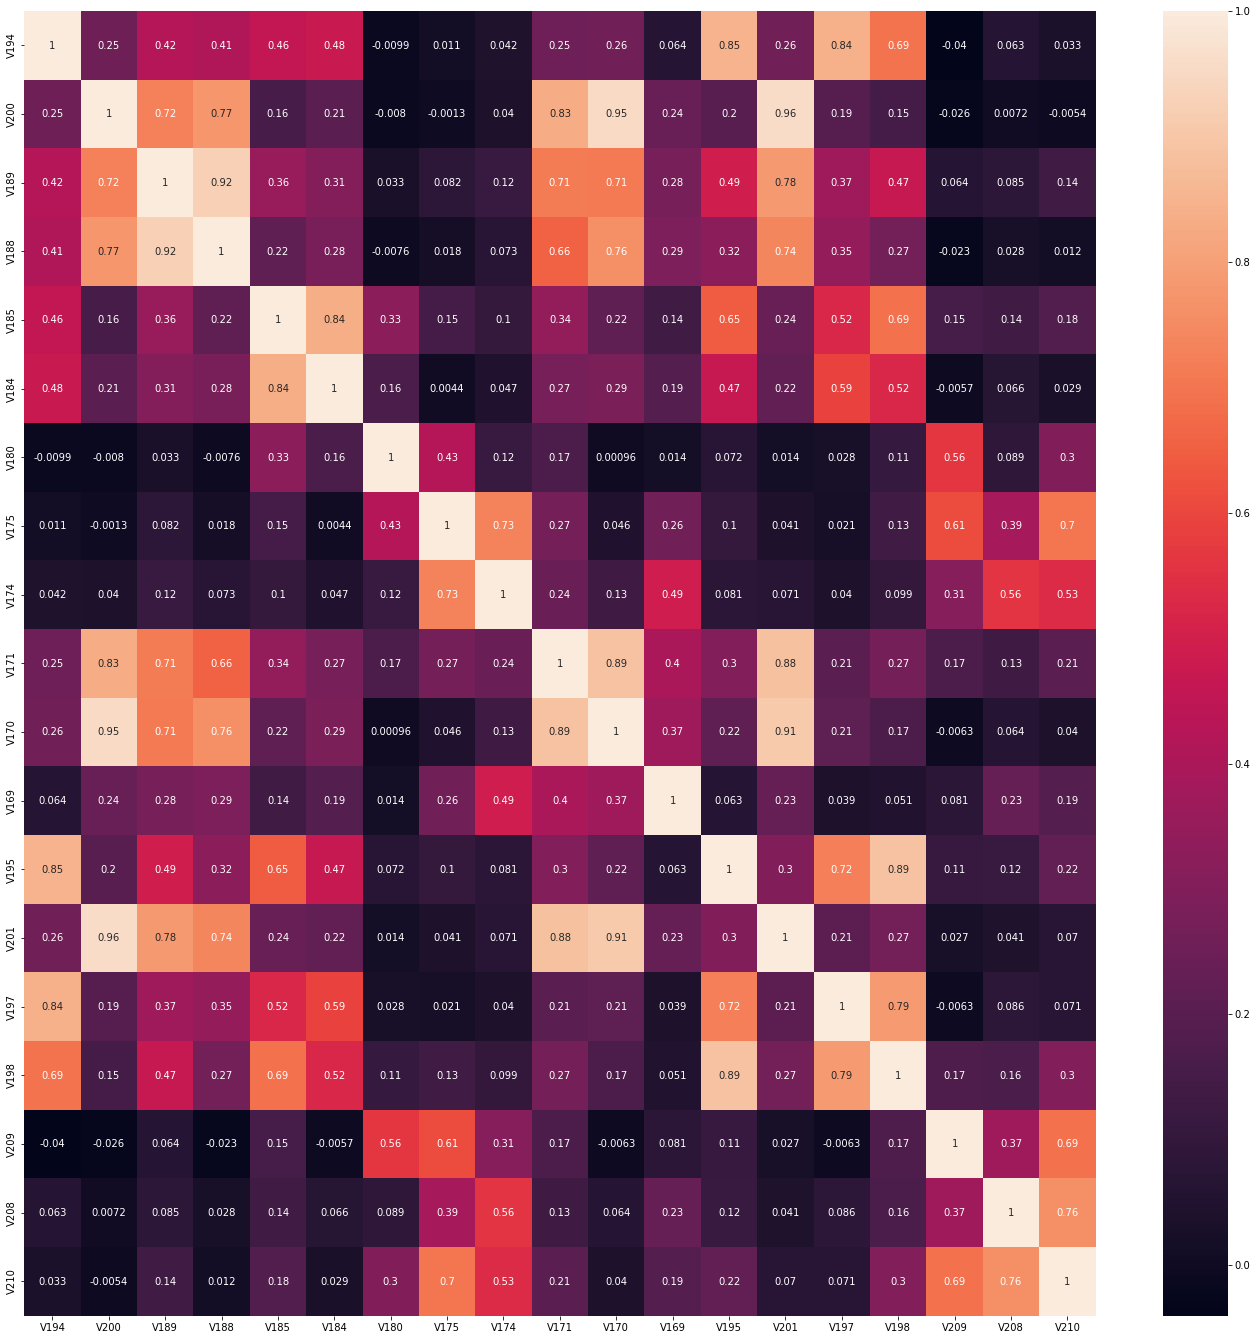

In [95]:
g10 = ['V194', 'V200', 'V189', 'V188', 'V185', 'V184', 'V180', 'V175', 'V174', 'V171',
        'V170', 'V169', 'V195', 'V201', 'V197', 'V198', 'V209', 'V208', 'V210']

corr = df[g10].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [96]:
pairs = [['V169'],['V170','V171','V200','V201'],['V174','V175'],['V180'],['V184','V185'],['V188','V189'],['V194','V195','V197','V198'],['V208','V210'],
         ['V209']]

g10 = reduction(pairs)
g10

['V169', 'V171', 'V175', 'V180', 'V185', 'V188', 'V198', 'V210', 'V209']

## group11 [V217 ~ V278]

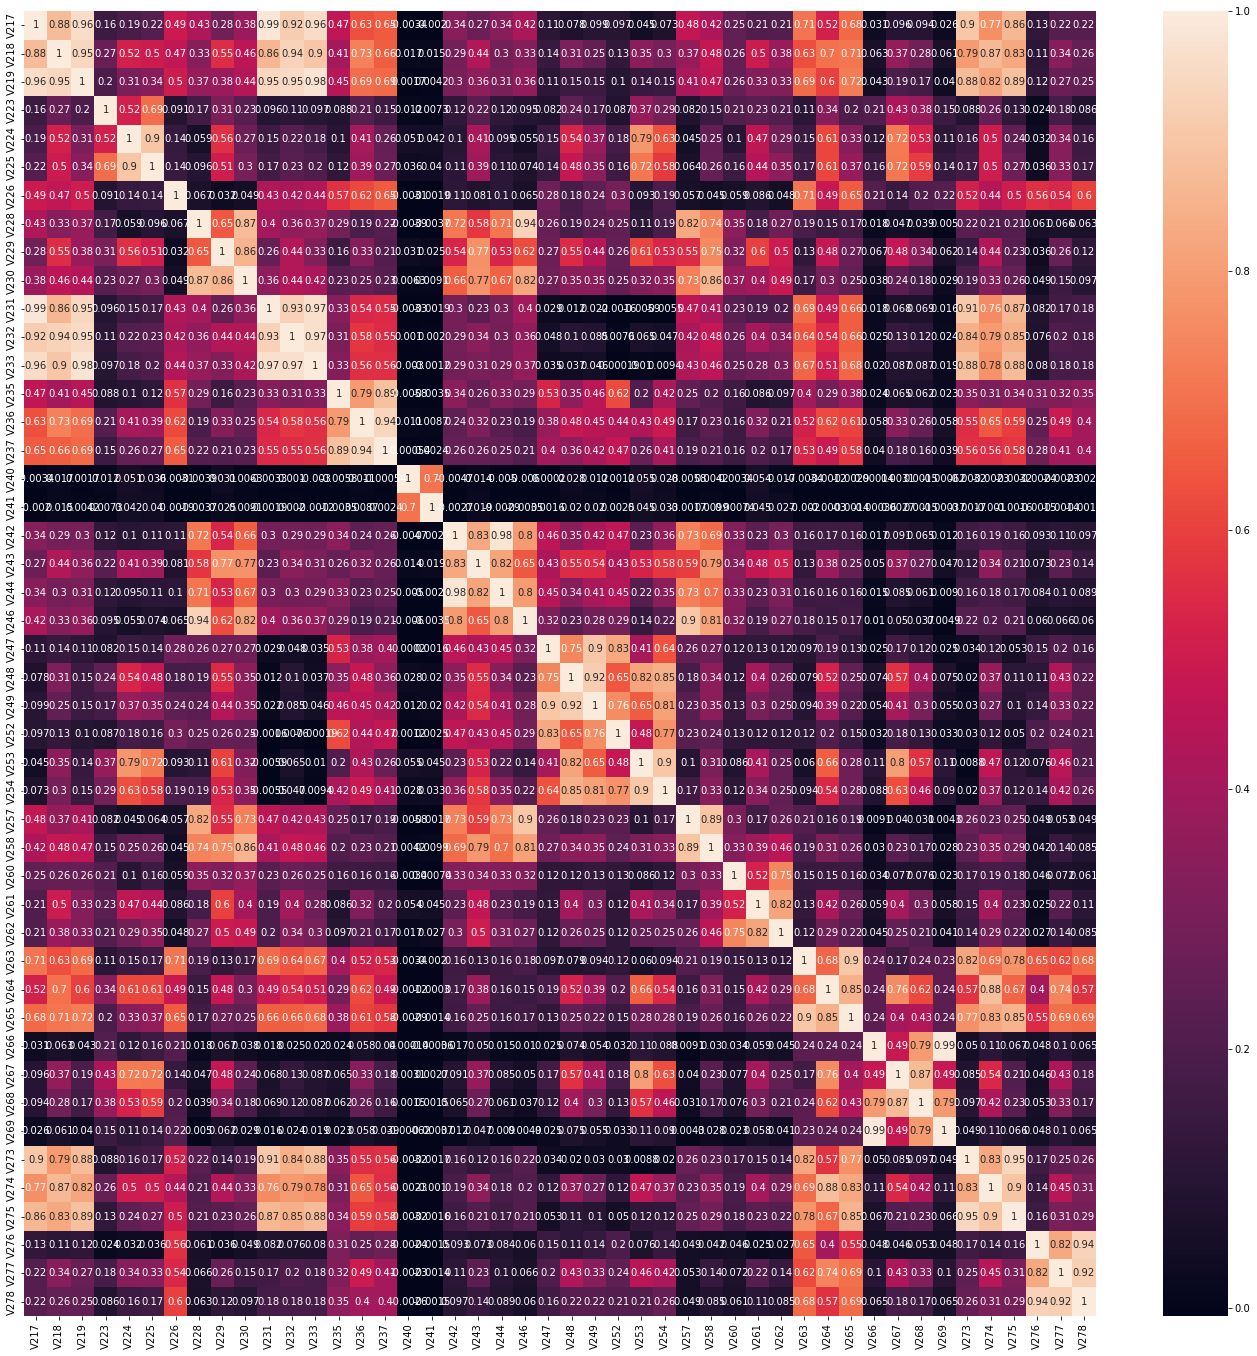

In [97]:
g11 = ['V217', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V229', 'V230', 'V231',
       'V232', 'V233', 'V235', 'V236', 'V237', 'V240', 'V241', 'V242', 'V243', 'V244', 'V246', 
       'V247', 'V248', 'V249', 'V252', 'V253', 'V254', 'V257', 'V258', 'V260', 'V261', 'V262', 'V263', 'V264', 
       'V265', 'V266', 'V267', 'V268', 'V269', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278']

corr = df[g11].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

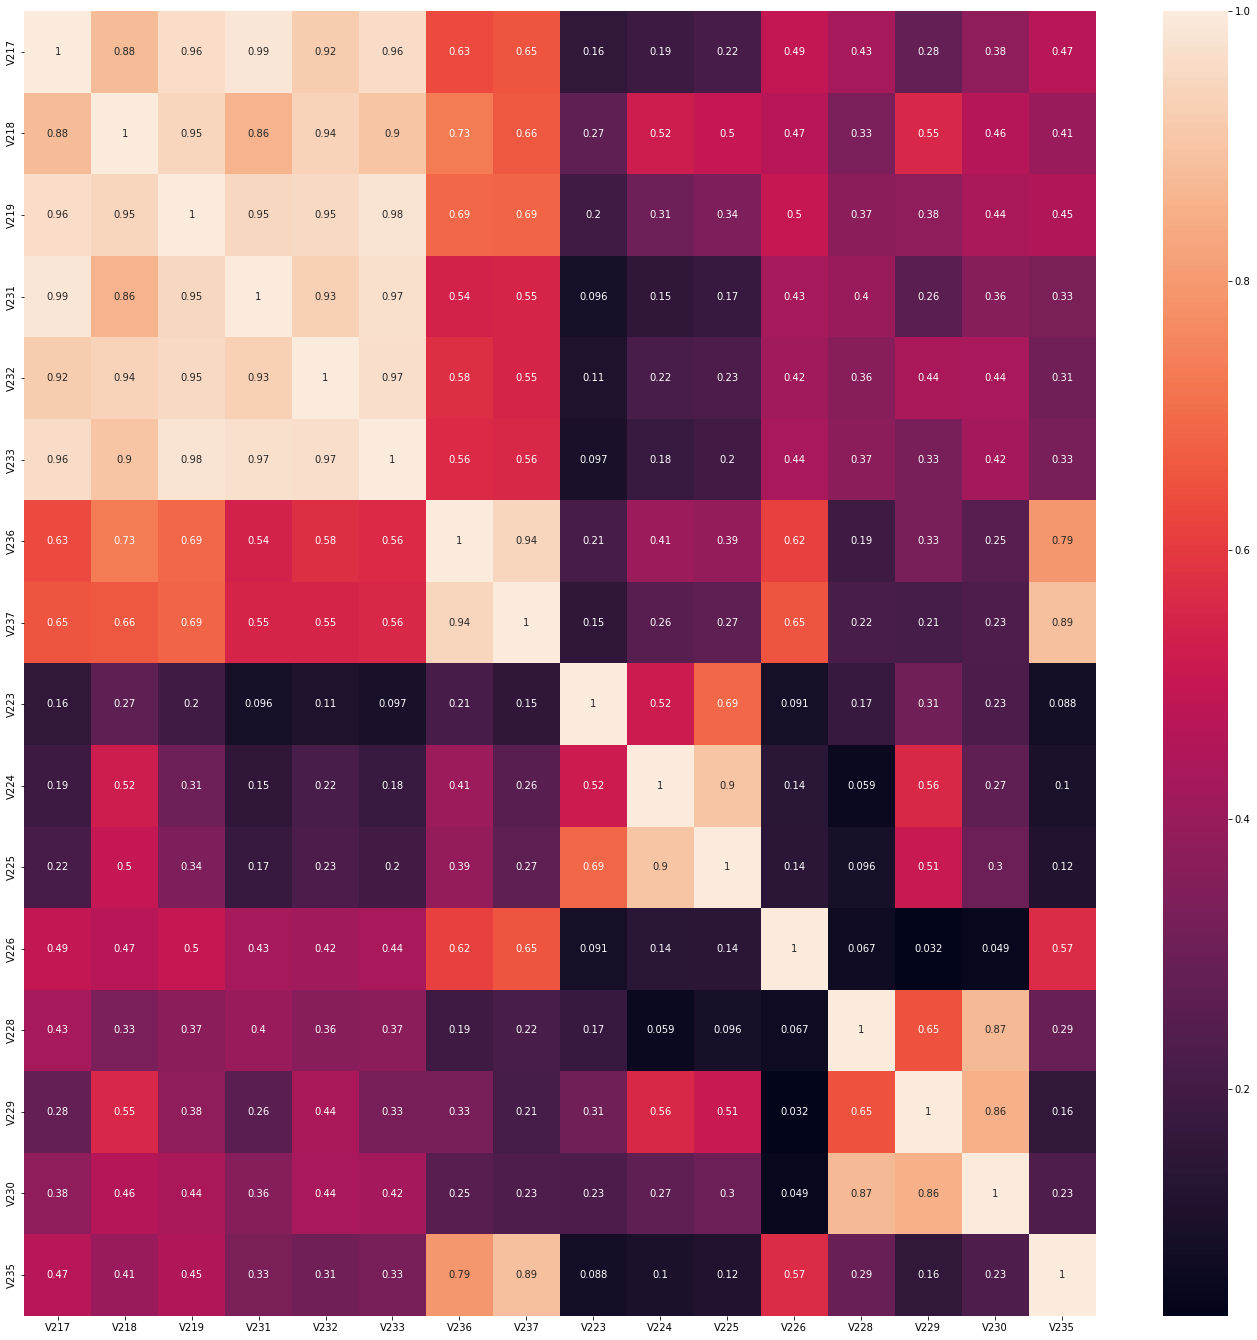

In [98]:
g11_1 = ['V217','V218','V219','V231','V232','V233','V236','V237','V223','V224','V225','V226','V228','V229','V230','V235']

corr = df[g11_1].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [99]:
pairs = [['V217','V218','V219','V231','V232','V233','V236','V237'],['V223'],['V224','V225'],['V226'],['V228'],['V229','V230'],['V235']]

g11_1 = reduction(pairs)
g11_1

['V218', 'V223', 'V224', 'V226', 'V228', 'V229', 'V235']

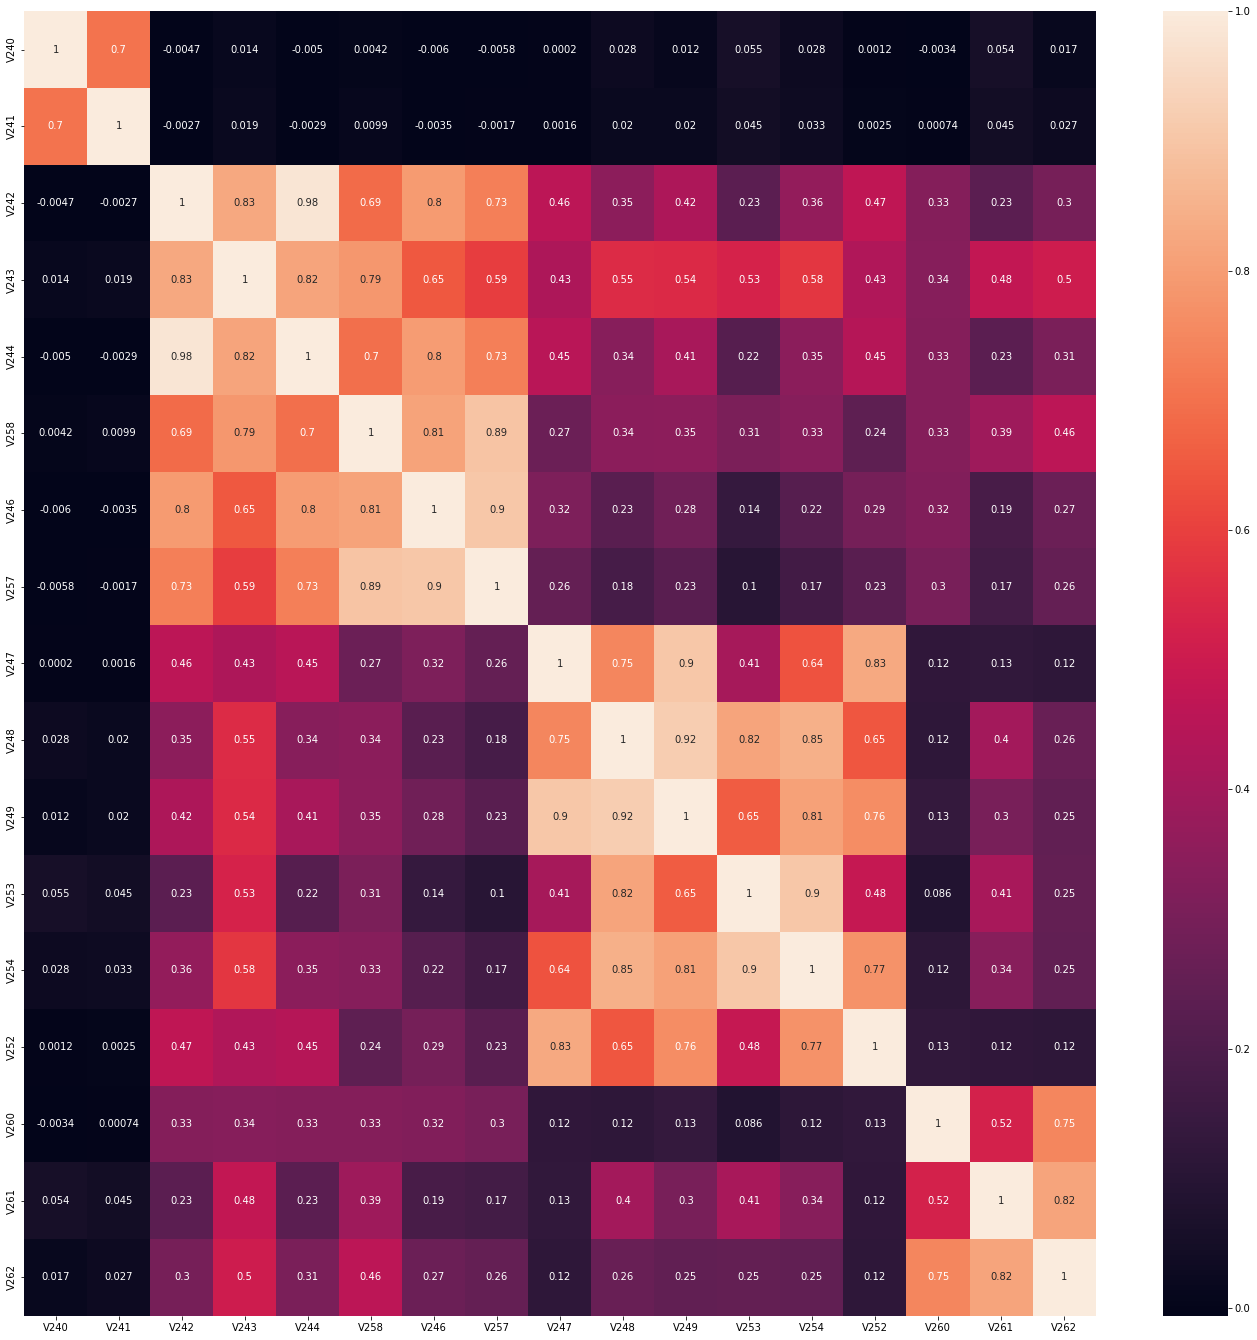

In [100]:
g11_2 = ['V240','V241','V242','V243','V244','V258','V246','V257','V247','V248','V249','V253','V254','V252','V260','V261','V262']

corr = df[g11_2].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [101]:
pairs = [['V240','V241'],['V242','V243','V244','V258'],['V246','V257'],['V247','V248','V249','V253','V254'],['V252'],['V260'],['V261','V262']]

g11_2 = reduction(pairs)
g11_2

['V240', 'V258', 'V257', 'V253', 'V252', 'V260', 'V261']

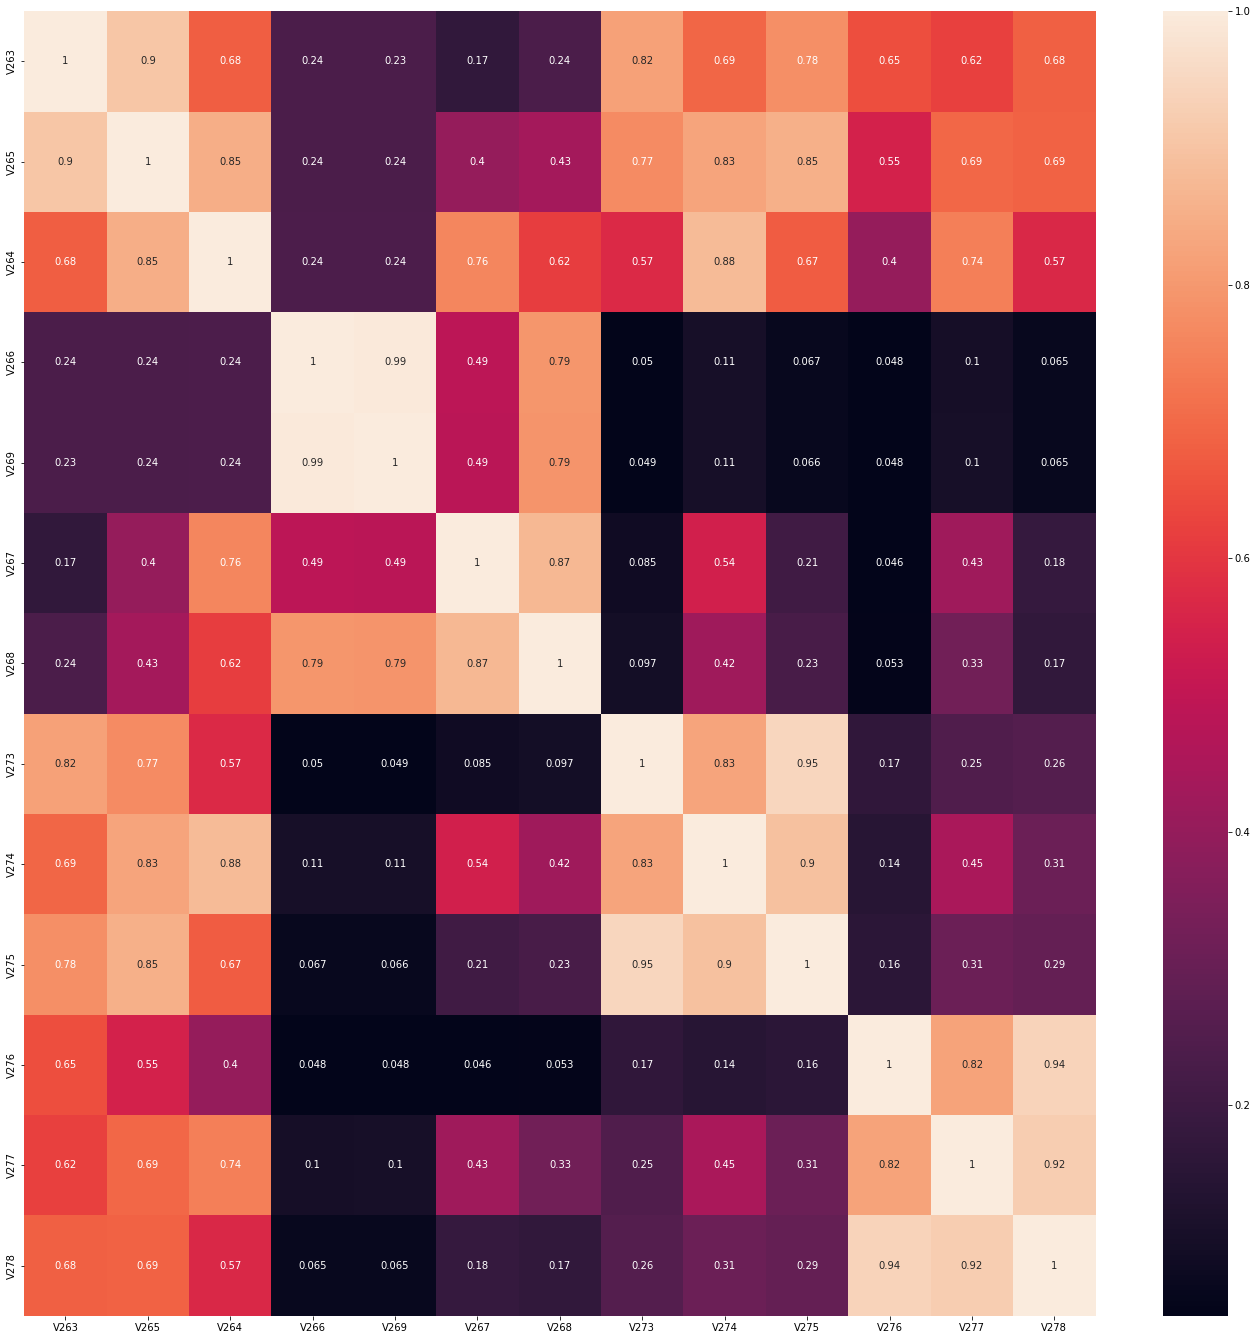

In [102]:
g11_3 =  ['V263','V265','V264','V266','V269','V267','V268','V273','V274','V275','V276','V277','V278']

corr = df[g11_3].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [103]:
pairs =[['V263','V265','V264'],['V266','V269'],['V267','V268'],['V273','V274','V275'],['V276','V277','V278']]

g11_3 = reduction(pairs)
g11_3

['V264', 'V266', 'V267', 'V274', 'V277']

## Group12 [V220 ~ V272]

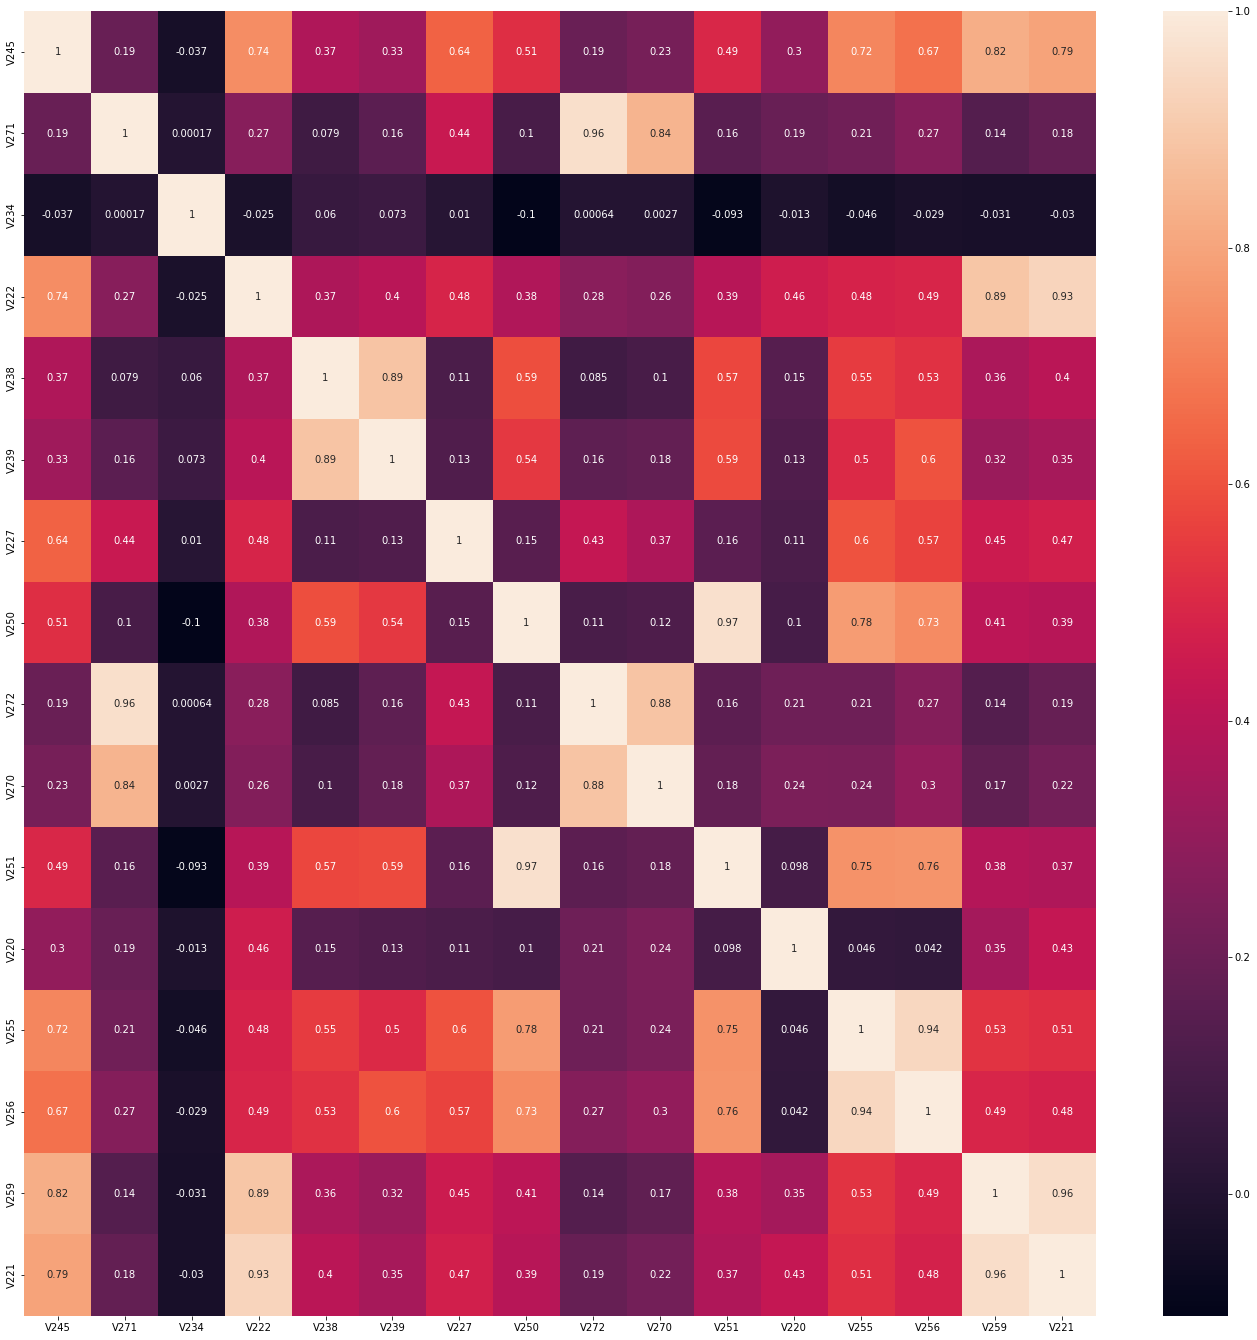

In [104]:
g12 = ['V245', 'V271', 'V234', 'V222', 'V238', 'V239', 'V227', 'V250','V272', 'V270', 'V251', 'V220', 'V255', 'V256', 'V259', 'V221']

corr = df[g12].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [105]:
pairs = [['V220'],['V221','V222','V227','V245','V255','V256','V259'],['V234'],['V238','V239'],['V250','V251'],['V270','V271','V272']]

g12 = reduction(pairs)
g12

['V220', 'V221', 'V234', 'V238', 'V250', 'V271']

## Group13 [V279 ~ V321]

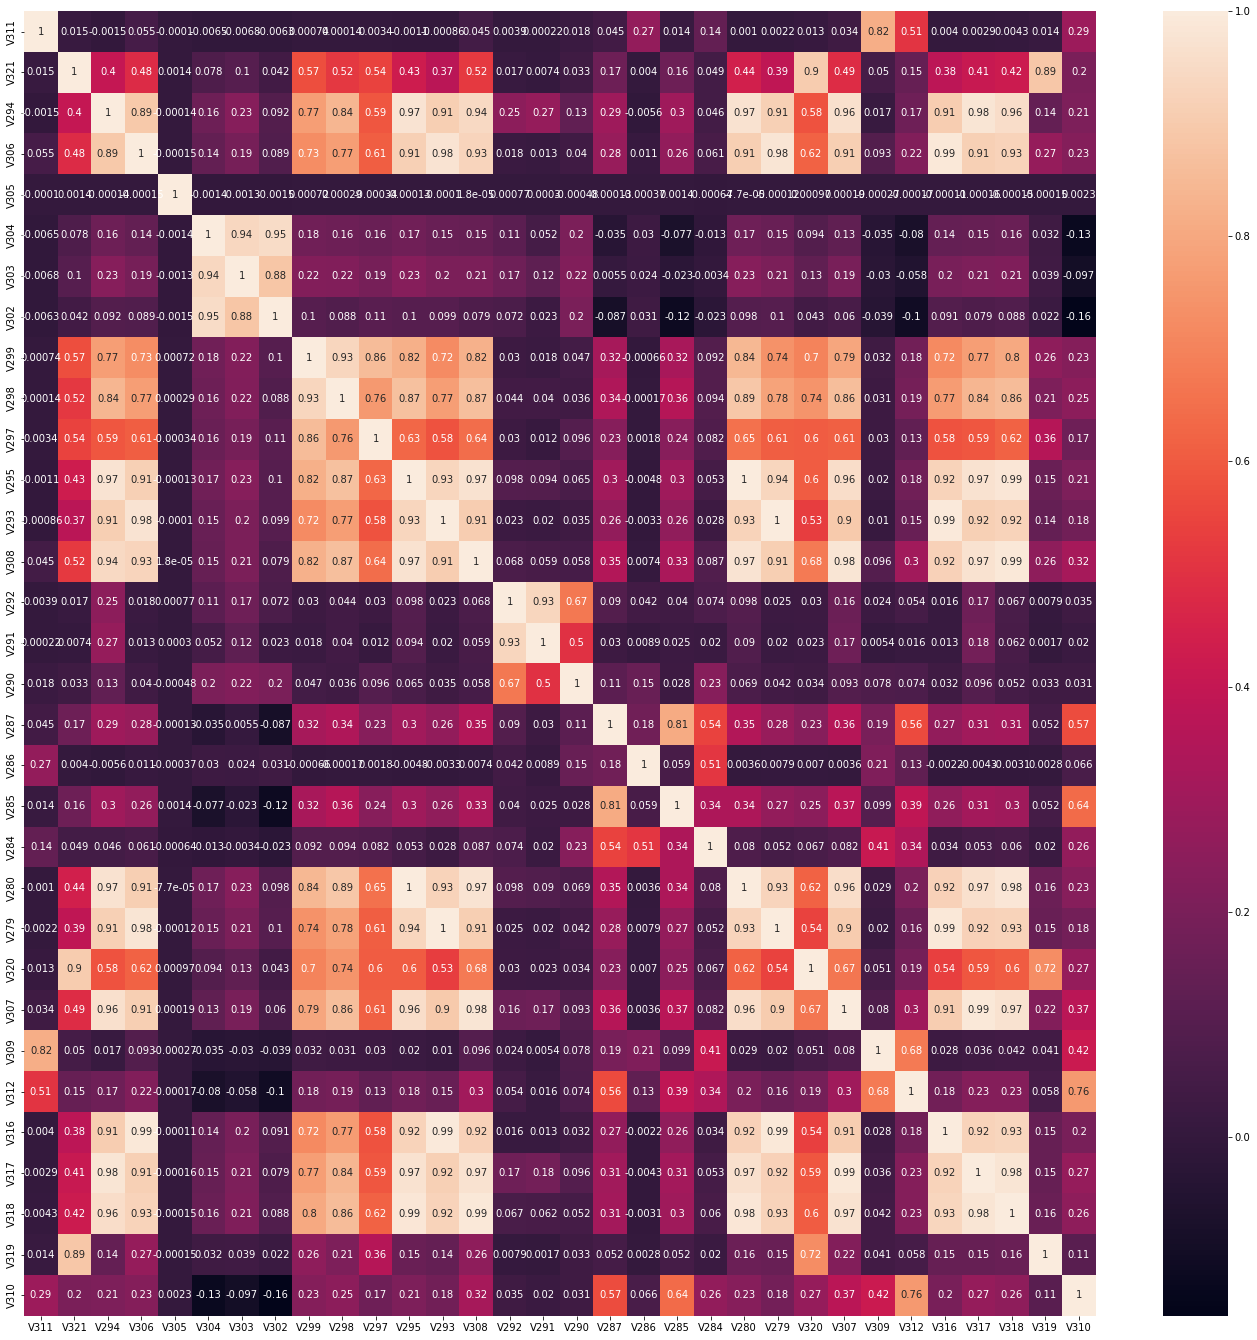

In [106]:
g13 = ['V311', 'V321', 'V294', 'V306', 'V305', 'V304', 'V303', 'V302', 'V299', 'V298', 'V297', 'V295', 
        'V293', 'V308', 'V292', 'V291', 'V290', 'V287', 'V286', 'V285', 'V284', 'V280', 'V279', 
        'V320', 'V307', 'V309', 'V312', 'V316', 'V317', 'V318', 'V319', 'V310']

corr = df[g13].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

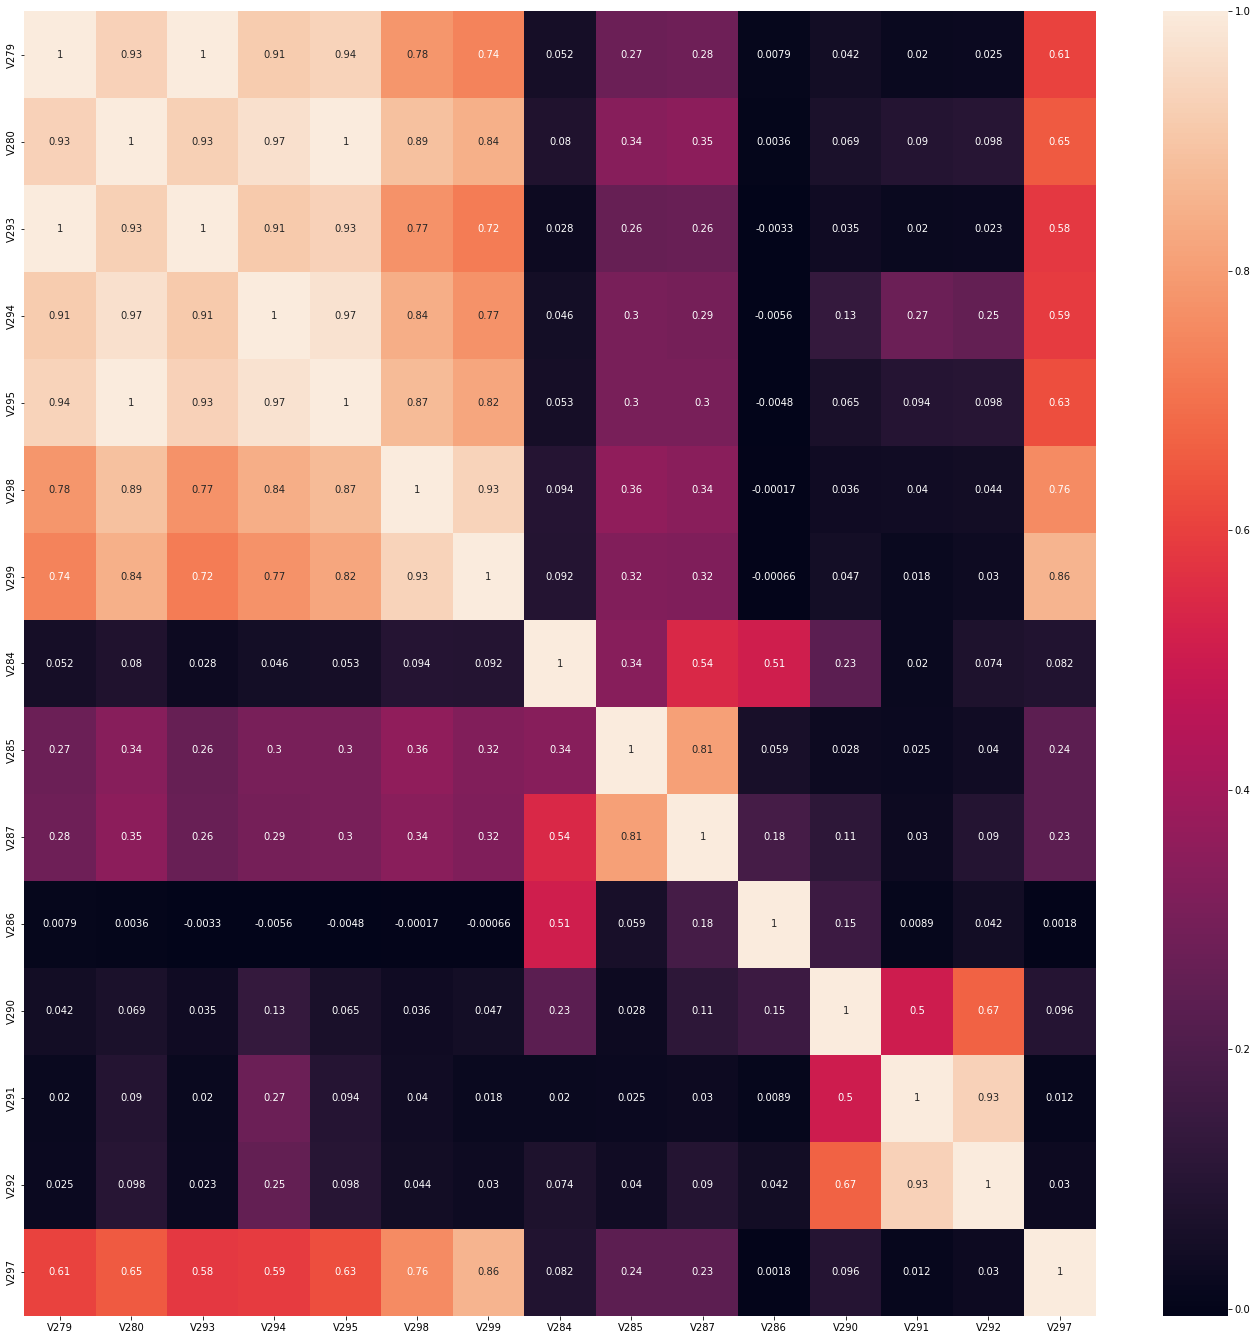

In [107]:
g13_1 = ['V279','V280','V293','V294','V295','V298','V299','V284','V285','V287','V286','V290','V291','V292','V297']

corr = df[g13_1].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [108]:
pairs = [['V279','V280','V293','V294','V295','V298','V299'],['V284'],['V285','V287'],['V286'],['V290','V291','V292'],['V297']]

g13_1 = reduction(pairs)
g13_1

['V294', 'V284', 'V285', 'V286', 'V291', 'V297']

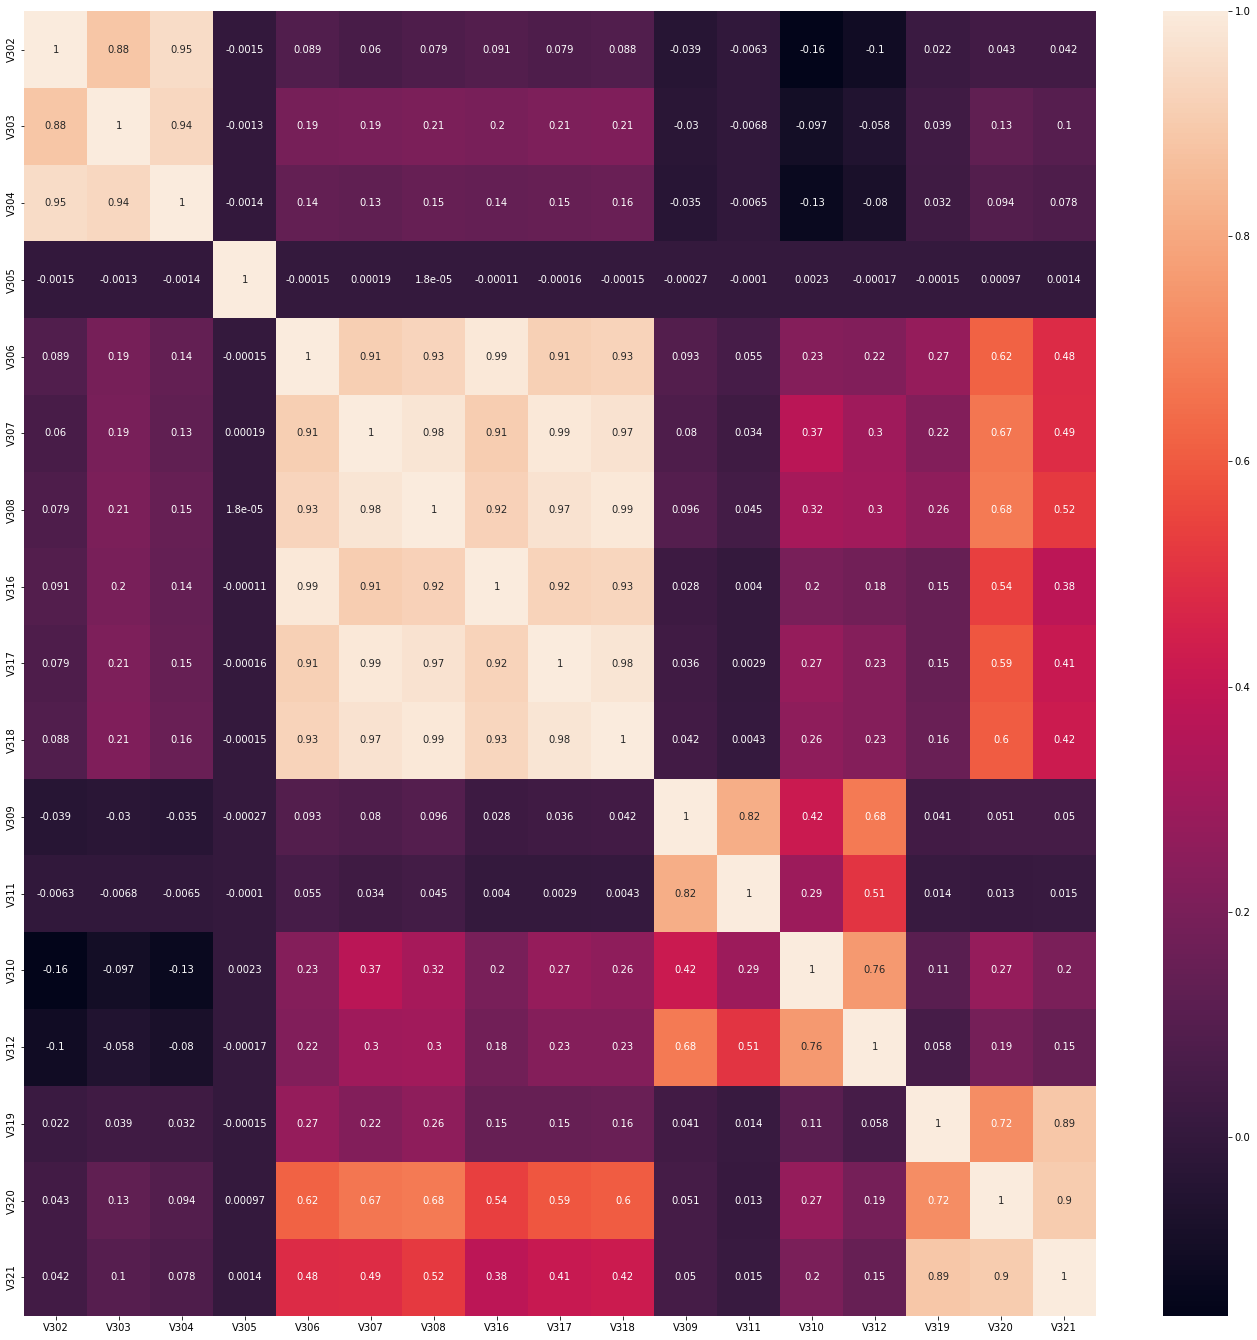

In [109]:
g13_2 = ['V302','V303','V304','V305','V306','V307','V308','V316','V317','V318','V309','V311','V310','V312','V319','V320','V321']

corr = df[g13_2].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [110]:
pairs = [['V302','V303','V304'],['V305'],['V306','V307','V308','V316','V317','V318'],['V309','V311'],['V310','V312'],['V319','V320','V321']]

g13_2 = reduction(pairs)
g13_2

['V303', 'V305', 'V307', 'V309', 'V310', 'V320']

## Group14 [V281-V313]

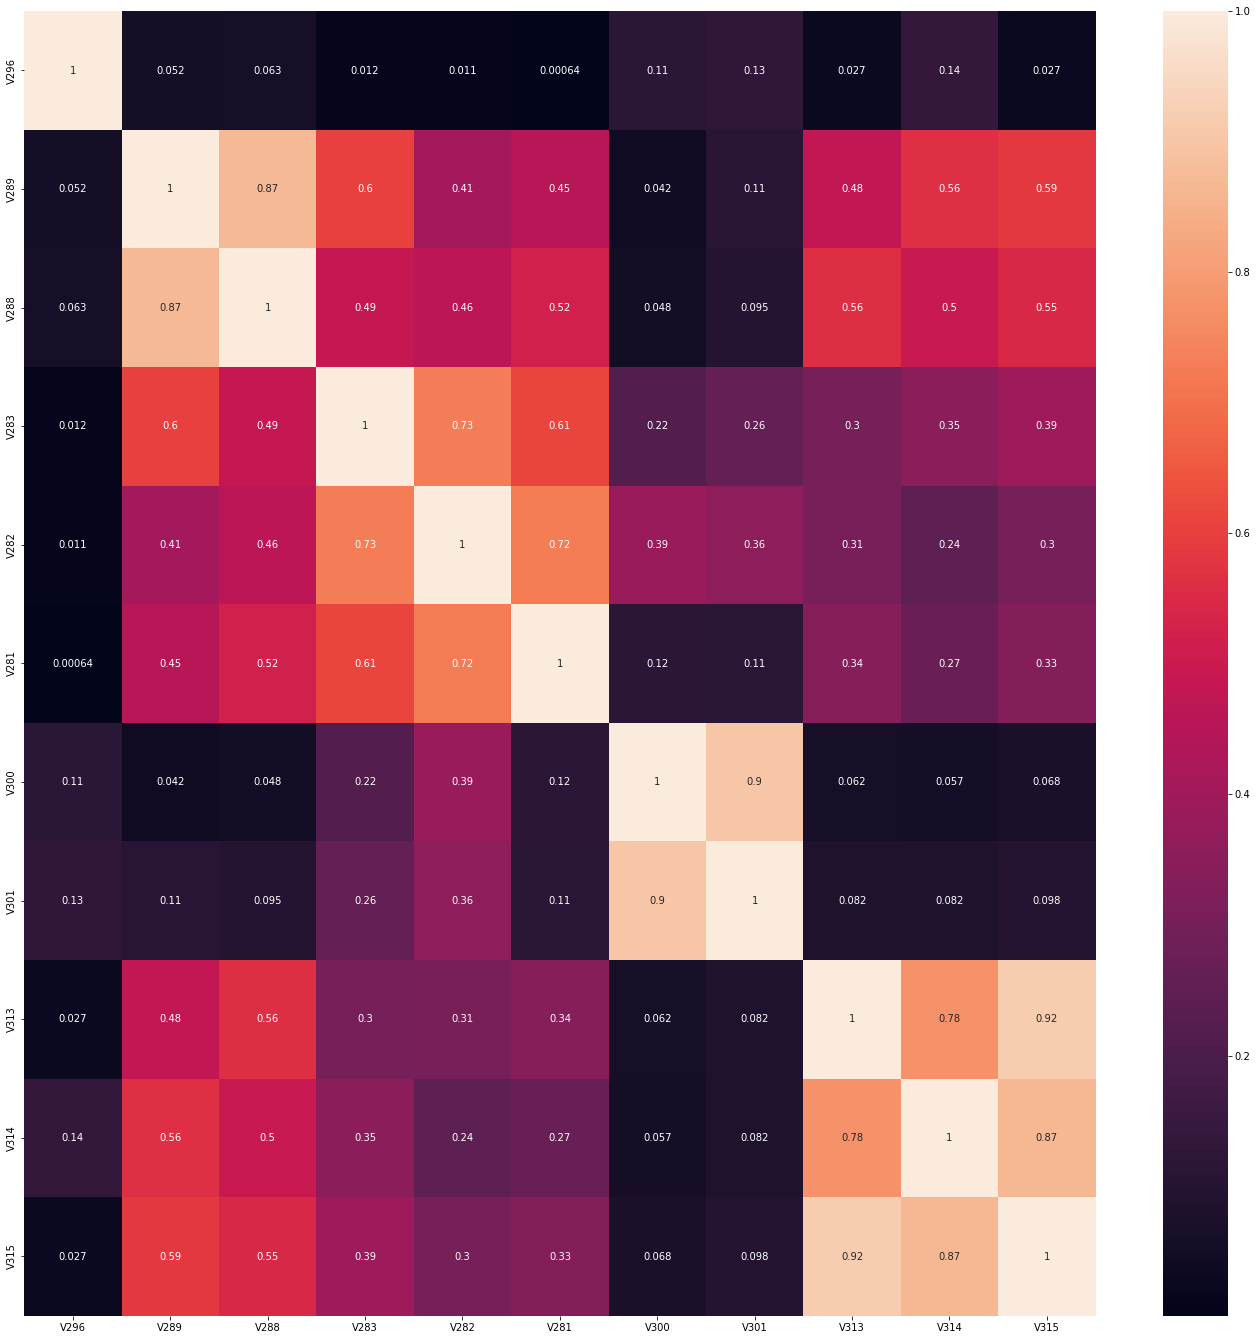

In [111]:
g14 = ['V296', 'V289', 'V288', 'V283', 'V282', 'V281', 'V300', 'V301', 'V313', 'V314', 'V315']

corr = df[g14].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [112]:
pairs = [['V281'],['V282','V283'],['V288','V289'],['V296'],['V300','V301'],['V313','V314','V315']]

g14 = reduction(pairs)
g14

['V281', 'V283', 'V289', 'V296', 'V301', 'V314']

## Group15 [V322 - V339]

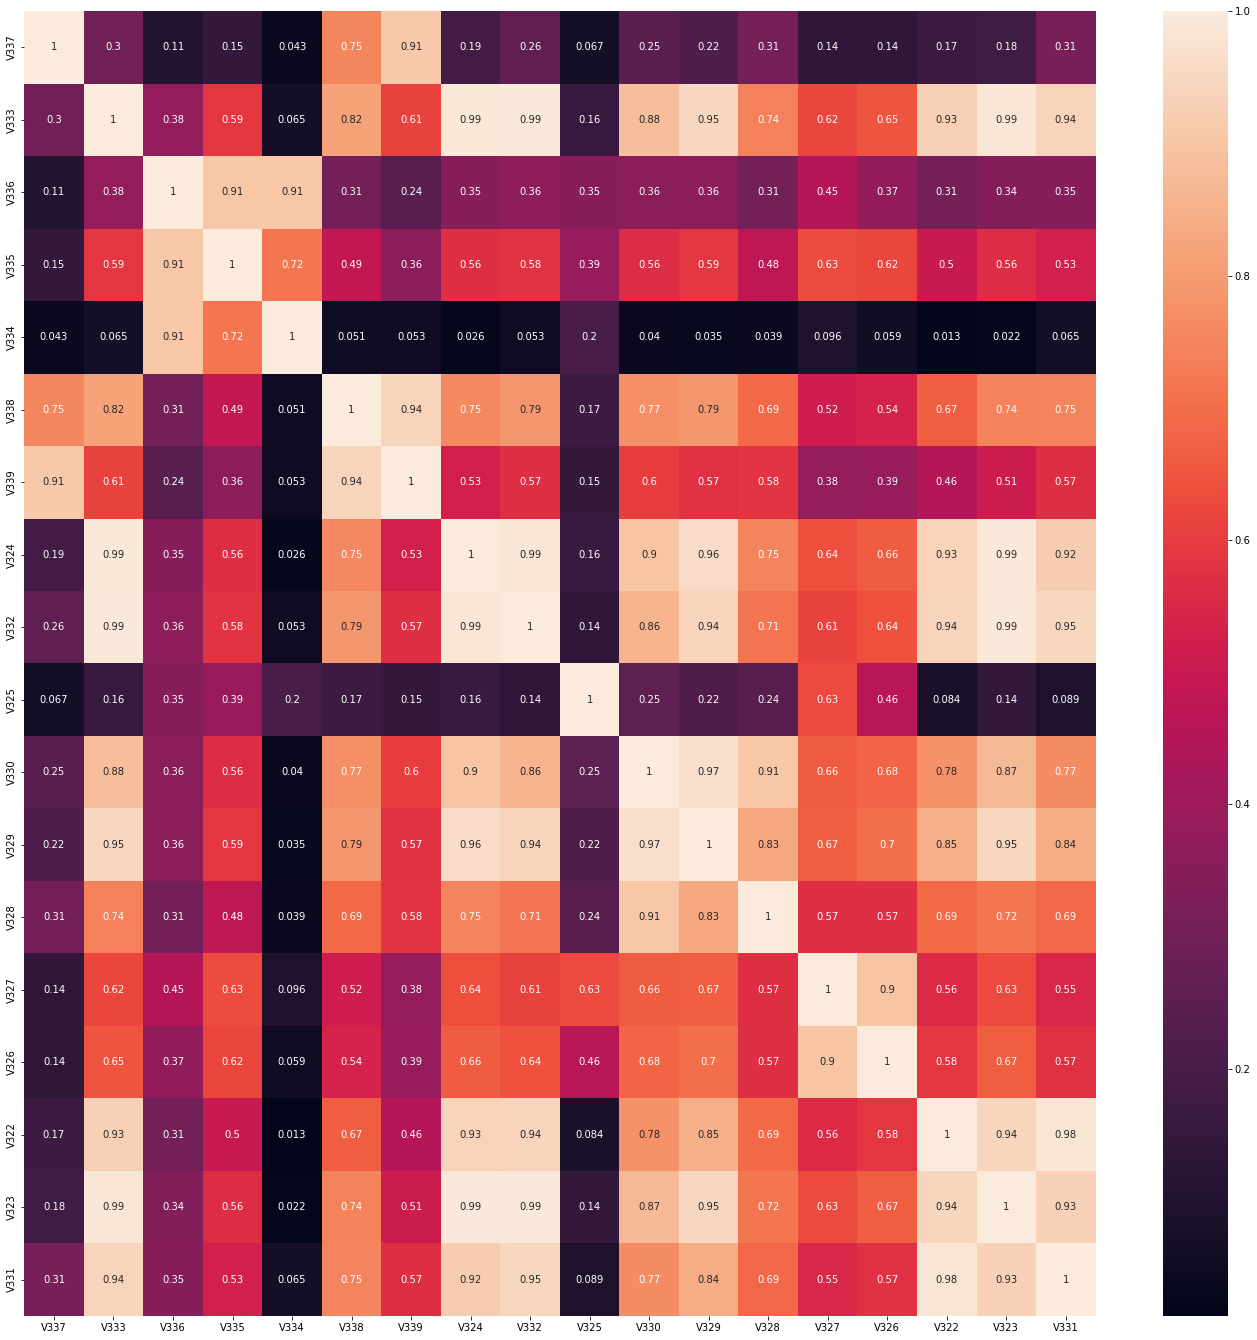

In [113]:
g15 = ['V337', 'V333', 'V336', 'V335', 'V334', 'V338', 'V339', 'V324', 'V332', 'V325', 'V330', 'V329', 'V328', 'V327', 'V326', 'V322', 'V323', 'V331']

corr = df[g15].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr, annot = True)

In [114]:
pairs = [['V322','V323','V324','V326','V327','V328','V329','V330','V331','V332','V333'],['V325'],['V334','V335','V336'],['V337','V338','V339']]

g15 = reduction(pairs)
g15

['V332', 'V325', 'V335', 'V338']

In [115]:
reduced_V_cols = ['V1', 'V3', 'V4', 'V6', 'V8', 'V11', 'V13', 'V14', 'V17', 'V20', 
 'V23', 'V26', 'V27', 'V30', 'V36', 'V37', 'V40', 'V41', 'V44', 'V47', 'V48', 'V54', 'V56', 'V59', 
 'V62', 'V65', 'V67', 'V68', 'V70', 'V76', 'V78', 'V80', 'V82', 'V86', 'V88', 'V89', 'V91', 'V96', 
 'V98', 'V99', 'V104', 'V107', 'V108', 'V111', 'V115', 'V117', 'V120', 'V121', 'V123', 'V124', 'V127', 
 'V129', 'V130', 'V136', 'V138', 'V139', 'V142', 'V147', 'V156', 'V162', 'V165', 'V160', 'V166', 'V178',
 'V176', 'V173', 'V182', 'V187', 'V203', 'V205', 'V207', 'V215', 'V169', 'V171', 'V175', 'V180', 'V185', 
 'V188', 'V198', 'V210', 'V209', 'V218', 'V223', 'V224', 'V226', 'V228', 'V229', 'V235', 'V240', 'V258', 
 'V257', 'V253', 'V252', 'V260', 'V261', 'V264', 'V266', 'V267', 'V274', 'V277', 'V220', 'V221', 'V234', 
 'V238', 'V250', 'V271', 'V294', 'V284', 'V285', 'V286', 'V291',
 'V297', 'V303', 'V305', 'V307', 'V309', 'V310', 'V320', 'V281', 'V283', 'V289', 'V296', 'V301', 'V314', 'V332', 'V325', 'V335', 'V338']

In [116]:
drop_cols = [col for col in df.columns if col[0] == 'V' and col not in reduced_V_cols]
df.drop(drop_cols, axis=1, inplace=True)
print('Dropped ' + str(len(drop_cols)) + ' columns successfully')

Dropped 211 columns successfully


In [117]:
df[reduced_V_cols] = my_imputer.fit_transform(df[reduced_V_cols])

In [118]:
df[id_cols].head(10)

id_01     id_02  id_03  id_04  id_05  id_06  id_09  id_10  id_11     id_12  \
0   -5.0  682411.0    NaN    NaN   -7.0  -34.0    NaN    NaN  100.0  NotFound   
1   -5.0   86522.0    NaN    NaN    0.0    0.0    NaN    NaN  100.0  NotFound   
2    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN   
3    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN   
4    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN   
5    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN   
6    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN   
7    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN   
8    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN   
9    NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN   

   id_13  id_14  id_15     id_16  id_17  id_18  id_19  id_20  id_28     id_29  \
0   64.0    NaN    New  NotFound  225.0   15.0  417.0  595.0    New  NotFound   
1   52.0 -480.0  Found  NotFound  166.0    NaN  410.0  177.0  Found  NotFound   
2    NaN    NaN    NaN       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
3    NaN    NaN    NaN       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
4    NaN    NaN    NaN       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
5    NaN    NaN    NaN       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
6    NaN    NaN    NaN       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
7    NaN    NaN    NaN       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
8    NaN    NaN    NaN       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
9    NaN    NaN    NaN       NaN    NaN    NaN    NaN    NaN    NaN       NaN   

        id_30           id_31  id_32      id_33           id_34 id_35 id_36  \
0         NaN  chrome generic    NaN        NaN             NaN     F     F   
1  Windows 10    firefox 57.0   24.0  1920x1080  match_status:2     T     F   
2         NaN             NaN    NaN        NaN             NaN   NaN   NaN   
3         NaN             NaN    NaN        NaN             NaN   NaN   NaN   
4         NaN             NaN    NaN        NaN             NaN   NaN   NaN   
5         NaN             NaN    NaN        NaN             NaN   NaN   NaN   
6         NaN             NaN    NaN        NaN             NaN   NaN   NaN   
7         NaN             NaN    NaN        NaN             NaN   NaN   NaN   
8         NaN             NaN    NaN        NaN             NaN   NaN   NaN   
9         NaN             NaN    NaN        NaN             NaN   NaN   NaN   

  id_37 id_38  
0     T     F  
1     T     F  
2   NaN   NaN  
3   NaN   NaN  
4   NaN   NaN  
5   NaN   NaN  
6   NaN   NaN  
7   NaN   NaN  
8   NaN   NaN  
9   NaN   NaN

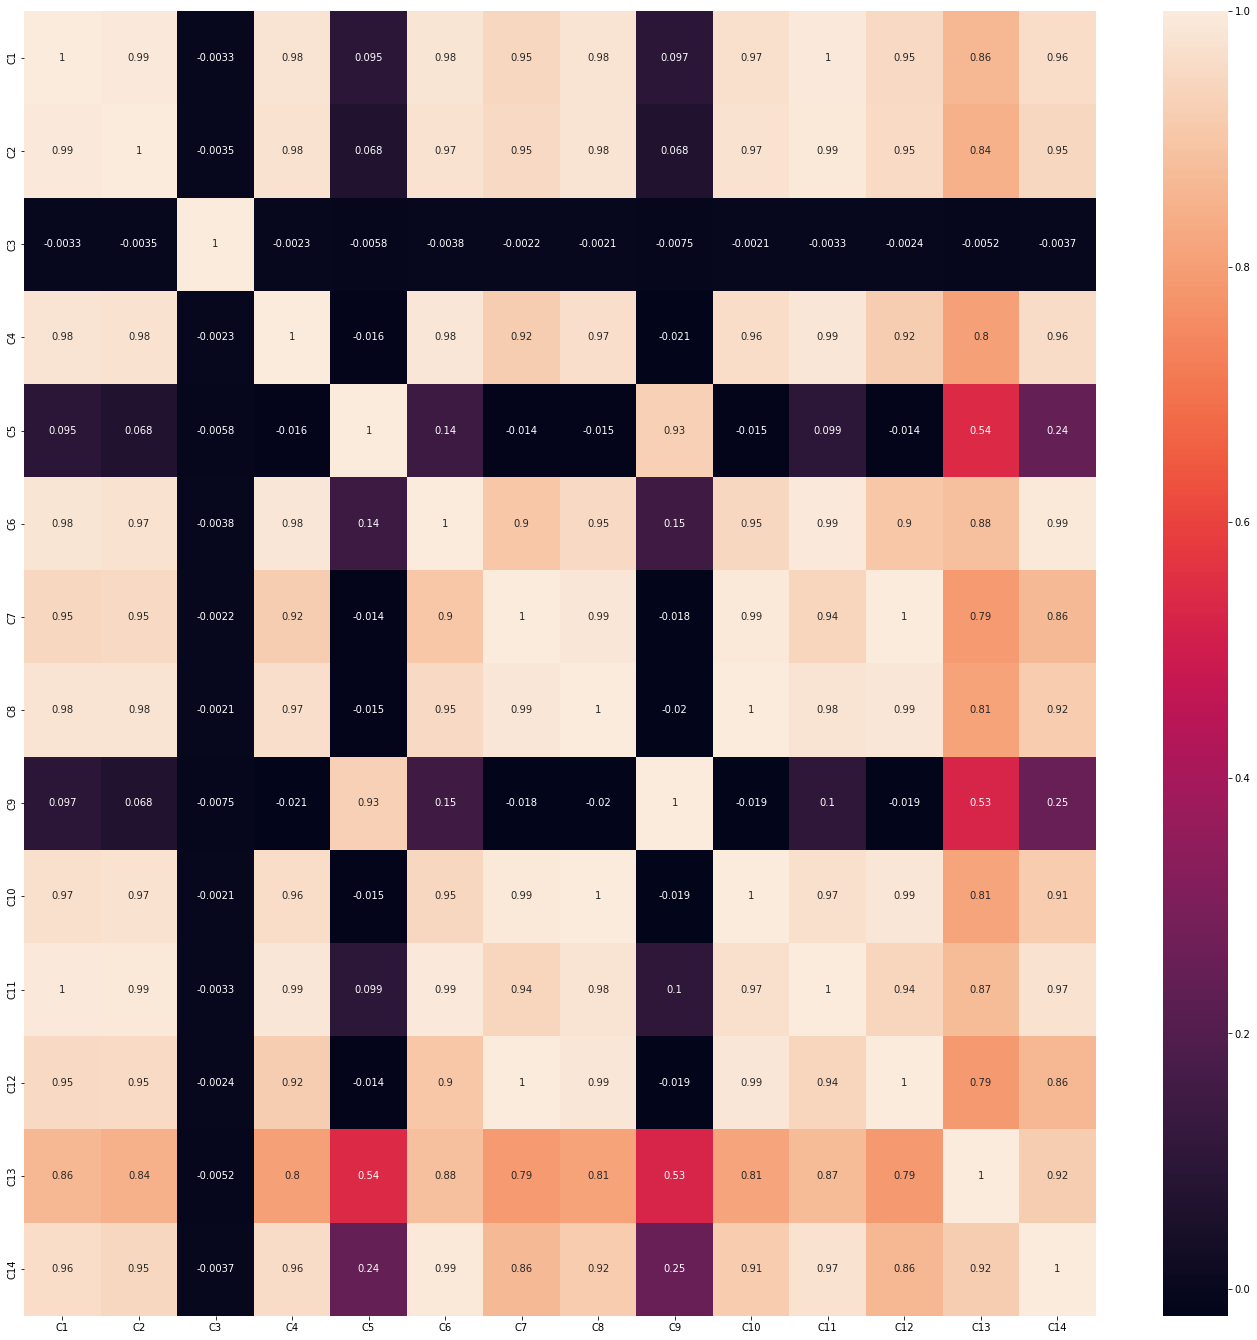

In [119]:
corr5 = df[c_cols].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr5, annot = True)

Except for C3 C5 C9 and C13, every other c column is highly correlated, so we drop them all.

In [120]:
del df['C1']
del df['C2']
del df['C4']
del df['C6']
del df['C7']
del df['C8']
del df['C10']
del df['C11']
del df['C12']
del df['C14']

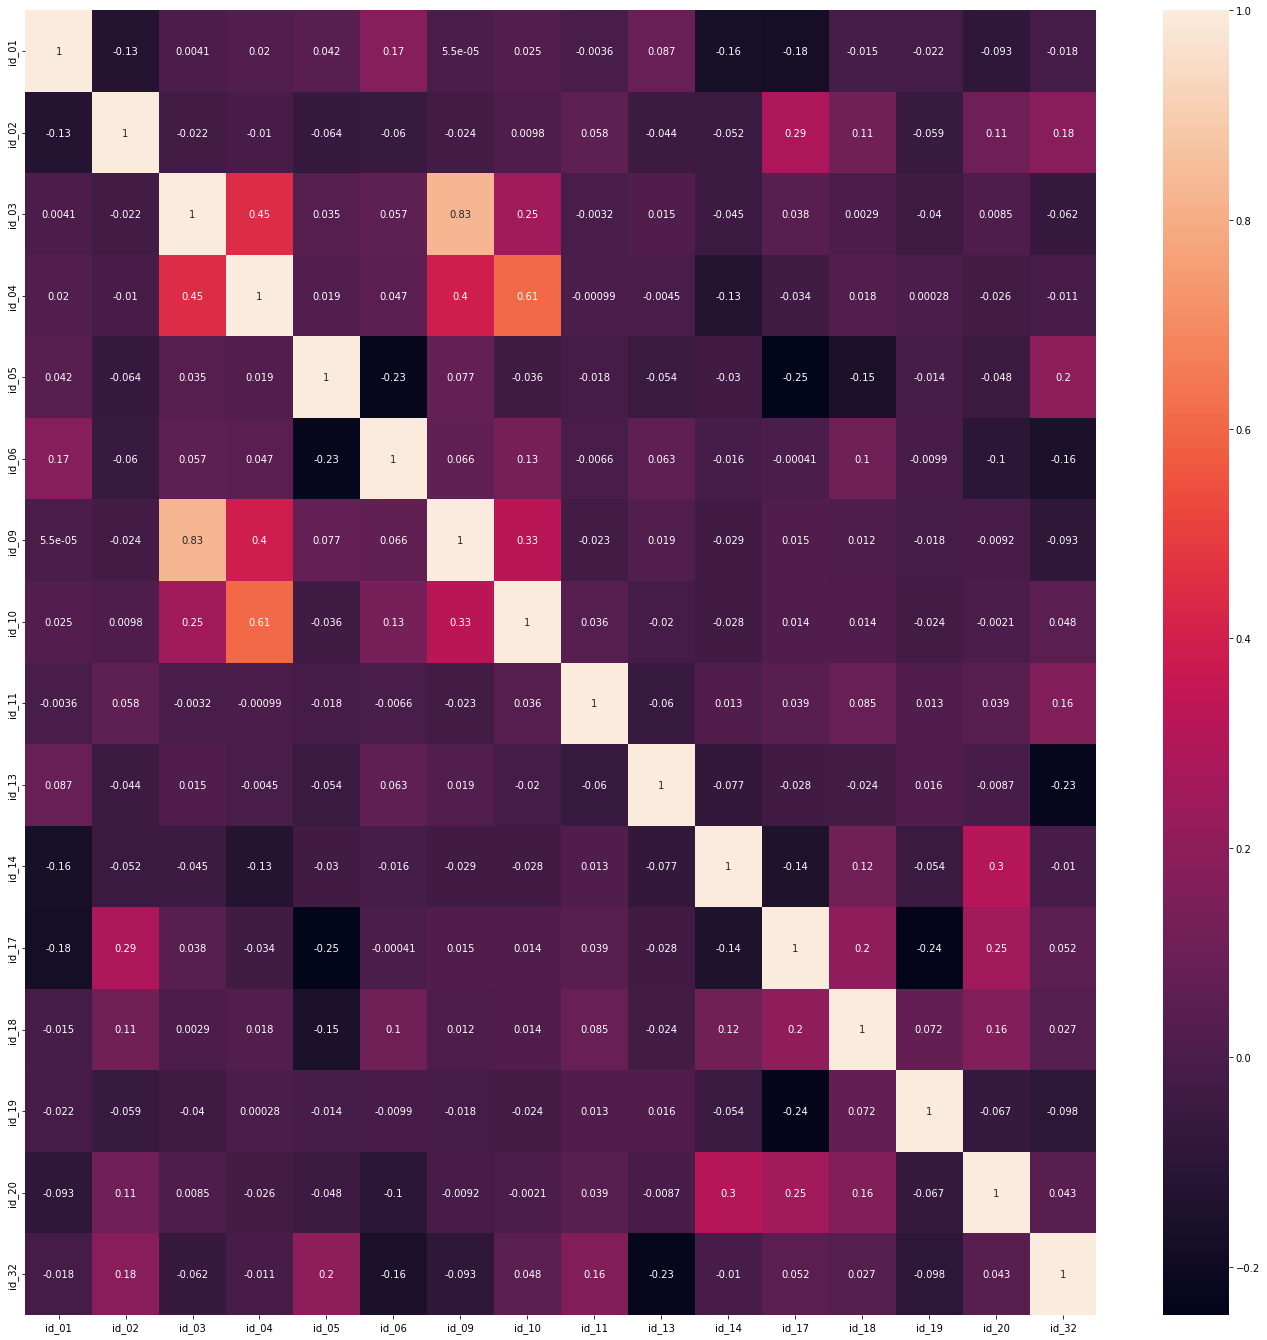

In [121]:
corr5 = df[id_cols].corr()
plt.figure(figsize = (24,24))
ax = sns.heatmap(corr5, annot = True)

In [122]:
df[id_cols].describe()

id_01          id_02          id_03          id_04  \
count  212765.000000  209388.000000  117726.000000  117726.000000   
mean      -12.922793  189060.046517       0.109007      -0.128561   
std        17.749838  167725.448147       0.984294       1.090554   
min      -100.000000       1.000000     -13.000000     -28.000000   
25%       -15.000000   73454.000000       0.000000       0.000000   
50%        -5.000000  137767.000000       0.000000       0.000000   
75%        -5.000000  251107.000000       0.000000       0.000000   
max         0.000000  999595.000000      10.000000       0.000000   

               id_05          id_06          id_09          id_10  \
count  204136.000000  204136.000000  131133.000000  131133.000000   
mean        1.556119      -7.334013       0.147980      -0.242334   
std         5.264715      16.718817       1.162496       2.081480   
min       -72.000000    -100.000000     -31.000000    -100.000000   
25%         0.000000      -8.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       0.000000   
max        52.000000       0.000000      17.000000       0.000000   

               id_11          id_13         id_14          id_17  \
count  209410.000000  193589.000000  92293.000000  206565.000000   
mean       99.752911      47.698320   -335.575938     197.328623   
std         1.083809      12.095336    102.736657      31.151772   
min        90.000000      10.000000   -660.000000     100.000000   
25%       100.000000      49.000000   -360.000000     166.000000   
50%       100.000000      52.000000   -300.000000     225.000000   
75%       100.000000      52.000000   -300.000000     225.000000   
max       100.000000      64.000000    720.000000     229.000000   

              id_18          id_19          id_20         id_32  
count  67597.000000  206486.000000  206347.000000  89260.000000  
mean      14.361555     342.413205     419.706194     26.952095  
std        1.484538     134.190912     147.215767      3.961702  
min       10.000000     100.000000     100.000000      0.000000  
25%       13.000000     266.000000     315.000000     24.000000  
50%       15.000000     312.000000     500.000000     24.000000  
75%       15.000000     427.000000     535.000000     32.000000  
max       29.000000     671.000000     661.000000     32.000000

In [123]:
df[id_cols].isna().sum()

id_01    405768
id_02    409145
id_03    500807
id_04    500807
id_05    414397
id_06    414397
id_09    487400
id_10    487400
id_11    409123
id_12    405768
id_13    424944
id_14    526240
id_15    409064
id_16    427917
id_17    411968
id_18    550936
id_19    412047
id_20    412186
id_28    409123
id_29    409123
id_30    529388
id_31    410193
id_32    529273
id_33    533126
id_34    528779
id_35    409064
id_36    409064
id_37    409064
id_38    409064
dtype: int64

In [124]:
num_id_cols = df[id_cols]._get_numeric_data().columns
cat_cols = list(set(id_cols) - set(num_id_cols))
cat_cols

['id_29',
 'id_28',
 'id_12',
 'id_15',
 'id_36',
 'id_37',
 'id_16',
 'id_30',
 'id_35',
 'id_33',
 'id_38',
 'id_31',
 'id_34']

In [125]:
df[num_id_cols] = my_imputer.fit_transform(df[num_id_cols])

In [126]:
df['id_33'].fillna(df['id_33'].mode()[0], inplace=True)
df['id_34'].fillna(df['id_34'].mode()[0], inplace=True)
df['id_30'].fillna(df['id_30'].mode()[0], inplace=True)
df['id_12'].fillna(df['id_12'].mode()[0], inplace=True)
df['id_31'].fillna(df['id_31'].mode()[0], inplace=True)
df['id_28'].fillna(df['id_28'].mode()[0], inplace=True)
df['id_38'].fillna(df['id_38'].mode()[0], inplace=True)
df['id_37'].fillna(df['id_37'].mode()[0], inplace=True)
df['id_35'].fillna(df['id_35'].mode()[0], inplace=True)
df['id_15'].fillna(df['id_15'].mode()[0], inplace=True)
df['id_16'].fillna(df['id_16'].mode()[0], inplace=True)
df['id_29'].fillna(df['id_29'].mode()[0], inplace=True)
df['id_36'].fillna(df['id_36'].mode()[0], inplace=True)

In [127]:
df['P_emaildomain'] = df['P_emaildomain'].fillna("Unknown")
df['R_emaildomain'] = df['R_emaildomain'].fillna("Unknown")
df['DeviceType'] = df['DeviceType'].fillna("Unknown")
df['DeviceInfo'] = df['DeviceInfo'].fillna("Unknown")

In [128]:
df.isna().sum()

TransactionID          0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2                  0
card3                  0
card4                  0
card5                  0
card6                  0
addr1                  0
addr2                  0
dist1                  0
dist2             555873
P_emaildomain          0
R_emaildomain          0
C3                     0
C5                     0
C9                     0
C13                    0
D1                     0
D3                     0
D4                     0
D5                     0
D7                534555
D8                     0
D9                     0
D10                    0
D11                    0
D13                    0
D14                    0
D15                    0
M1                     0
M2                     0
M3                     0
M4                     0
M5                     0
M6                     0
M7                     0
M8                     0


In [129]:
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['id_29',
 'id_15',
 'id_36',
 'M9',
 'id_31',
 'M8',
 'R_emaildomain',
 'ProductCD',
 'id_35',
 'M5',
 'id_34',
 'id_28',
 'card6',
 'M7',
 'M4',
 'M3',
 'id_37',
 'id_30',
 'M2',
 'M6',
 'M1',
 'card4',
 'P_emaildomain',
 'id_16',
 'DeviceType',
 'id_12',
 'id_33',
 'id_38',
 'DeviceInfo']

In [130]:
for i in cat_cols:
    print( i+ ": " + str(df[i].nunique()))

id_29: 2
id_15: 3
id_36: 2
M9: 2
id_31: 124
M8: 2
R_emaildomain: 61
ProductCD: 5
id_35: 2
M5: 2
id_34: 4
id_28: 2
card6: 4
M7: 2
M4: 3
M3: 2
id_37: 2
id_30: 74
M2: 2
M6: 2
M1: 2
card4: 4
P_emaildomain: 60
id_16: 2
DeviceType: 3
id_12: 2
id_33: 235
id_38: 2
DeviceInfo: 1654


In [131]:
small_cat_cols = []
big_cat_cols = []
for i in cat_cols:
    if df[i].nunique()<7:
        small_cat_cols.append(i)
    else:
        big_cat_cols.append(i)
small_cat_cols

['id_29',
 'id_15',
 'id_36',
 'M9',
 'M8',
 'ProductCD',
 'id_35',
 'M5',
 'id_34',
 'id_28',
 'card6',
 'M7',
 'M4',
 'M3',
 'id_37',
 'M2',
 'M6',
 'M1',
 'card4',
 'id_16',
 'DeviceType',
 'id_12',
 'id_38']

In [132]:
df= pd.get_dummies(data=df, columns = small_cat_cols )
df.shape

(618533, 235)

In [133]:
for i in big_cat_cols:
    df[i] = df[i].astype('category')

for i in big_cat_cols:
    df[i] = df[i].cat.codes

df.shape

(618533, 235)

In [134]:
df.head(10)

TransactionID  TransactionDT  TransactionAmt    card1  card2  card3  card5  \
0        3404955       10551144          16.434  15146.0  311.0  185.0  102.0   
1        3062723        1651169         100.000   8075.0  399.0  150.0  119.0   
2        3121154        2675413         226.000   9500.0  321.0  150.0  226.0   
3        3028876        1020945         107.950  15675.0  555.0  150.0  226.0   
4        3316269        8105299         186.000   7919.0  194.0  150.0  166.0   
5        3420183       10954704         117.000  14392.0  526.0  150.0  226.0   
6        3476885       12774196          30.950  11814.0  455.0  150.0  126.0   
7        3286827        7412446          57.950  10616.0  583.0  150.0  226.0   
8        3373371        9677867          33.950   2392.0  360.0  150.0  126.0   
9        3060541        1629886          26.500   1444.0  490.0  150.0  166.0   

        addr1      addr2       dist1  dist2  P_emaildomain  R_emaildomain  \
0  291.842013  86.679791  130.451743    NaN             20             20   
1  512.000000  87.000000  130.451743    NaN             17              2   
2  272.000000  87.000000    4.000000    NaN             54              0   
3  420.000000  87.000000   12.000000    NaN             54              0   
4  327.000000  87.000000  130.451743    NaN             17              0   
5  264.000000  87.000000    3.000000    NaN             20              0   
6  492.000000  87.000000  191.000000    NaN             17              0   
7  264.000000  87.000000   19.000000    NaN              0              0   
8  433.000000  87.000000    3.000000    NaN             17              0   
9  126.000000  87.000000    1.000000    NaN             54              0   

    C3   C5   C9   C13     D1         D3          D4         D5  D7  \
0  0.0  0.0  0.0   1.0    0.0  23.734579    0.000000  32.347574 NaN   
1  0.0  0.0  0.0   1.0    0.0  23.734579  117.572516  32.347574 NaN   
2  0.0  0.0  3.0   5.0    0.0  23.734579  252.000000  57.000000 NaN   
3  0.0  1.0  1.0  12.0  469.0  65.000000  469.000000  65.000000 NaN   
4  0.0  0.0  2.0   7.0   26.0   0.000000  304.000000   0.000000 NaN   
5  0.0  0.0  1.0  20.0  174.0  11.000000  174.000000  11.000000 NaN   
6  0.0  1.0  2.0  22.0  620.0  11.000000   99.000000  11.000000 NaN   
7  0.0  1.0  1.0   7.0   46.0   7.000000  117.572516  32.347574 NaN   
8  0.0  3.0  5.0  14.0   43.0   0.000000   42.000000   0.000000 NaN   
9  0.0  0.0  1.0   1.0    0.0  23.734579    0.000000  32.347574 NaN   

          D8        D9         D10         D11        D13        D14  \
0  88.004338  0.534143    0.000000  134.530176   0.000000  53.643162   
1  88.004338  0.534143  102.031751  134.530176  10.719994  53.643162   
2  88.004338  0.534143   84.000000    0.000000  10.719994  53.643162   
3  88.004338  0.534143  469.000000  469.000000  10.719994  53.643162   
4  88.004338  0.534143  212.000000    0.000000  10.719994  53.643162   
5  88.004338  0.534143   98.000000  177.000000  10.719994  53.643162   
6  88.004338  0.534143  621.000000   99.000000  10.719994  53.643162   
7  88.004338  0.534143   47.000000   47.000000  10.719994  53.643162   
8  88.004338  0.534143   42.000000   42.000000  10.719994  53.643162   
9  88.004338  0.534143    0.000000    0.000000  10.719994  53.643162   

          D15        V1        V3        V4        V6        V8       V11  \
0    0.000000  0.999964  1.102407  0.854014  1.050259  1.032313  0.420458   
1  137.339635  0.999964  1.102407  0.854014  1.050259  1.032313  0.420458   
2   84.000000  1.000000  1.000000  1.000000  1.000000  1.000000  0.000000   
3  469.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
4  304.000000  1.000000  2.000000  2.000000  1.000000  1.000000  0.000000   
5  177.000000  1.000000  1.000000  0.000000  1.000000  1.000000  0.000000   
6   80.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
7   47.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.00000

In [135]:
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

[]

In [136]:
train_df = df.iloc[:470898,:]

In [137]:
train_df.shape

(470898, 235)

In [138]:
test_df = df.iloc[470898:,:]

In [139]:
test_df.shape

(147635, 235)

In [140]:
XGBmodel = xgb.XGBClassifier()
XGBmodel.fit(train_df, y_train)
 
y_pred = XGBmodel.predict(test_df)

In [141]:
pd.DataFrame(y_pred).to_csv('y_pred.csv')

In [142]:
pd.DataFrame(test_df).to_csv('preprocessedV1_testdata.csv')

In [143]:
pd.DataFrame(train_df).to_csv('preprocessedV2_traindata.csv')

In [144]:
pd.DataFrame(y_train).to_csv('preprocessedV3_ytrain.csv')

In [ ]:
Train_df = Train_df.append(y_train)